# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle to make black and white images and dashed and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [2]:
#Extra Headers:
import os as os
import pywt as py
import statistics as st
import os as os
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
import platform

from time import time as ti

import CoreFunctions as cf



## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [3]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [4]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [5]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Recordings2/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\SubSet\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

In [6]:
files = os.listdir(folder)

In [7]:
Saving = False
location = folder
Titles = True
Ledgends = True

ODataSet = np.genfromtxt(open(folder+files[0],'r'), delimiter=',',skip_header=0)
print(files[0],np.shape(ODataSet))
#ODataSet = ODataSet[start:end,:]

length = np.shape(ODataSet)[0]




smooth=np.zeros((length,18))


220919 recording3.csv (11745763, 7)


<Figure size 5336x3000 with 0 Axes>

In [36]:
ODataSet[:,5]-=np.average(ODataSet[:,5])

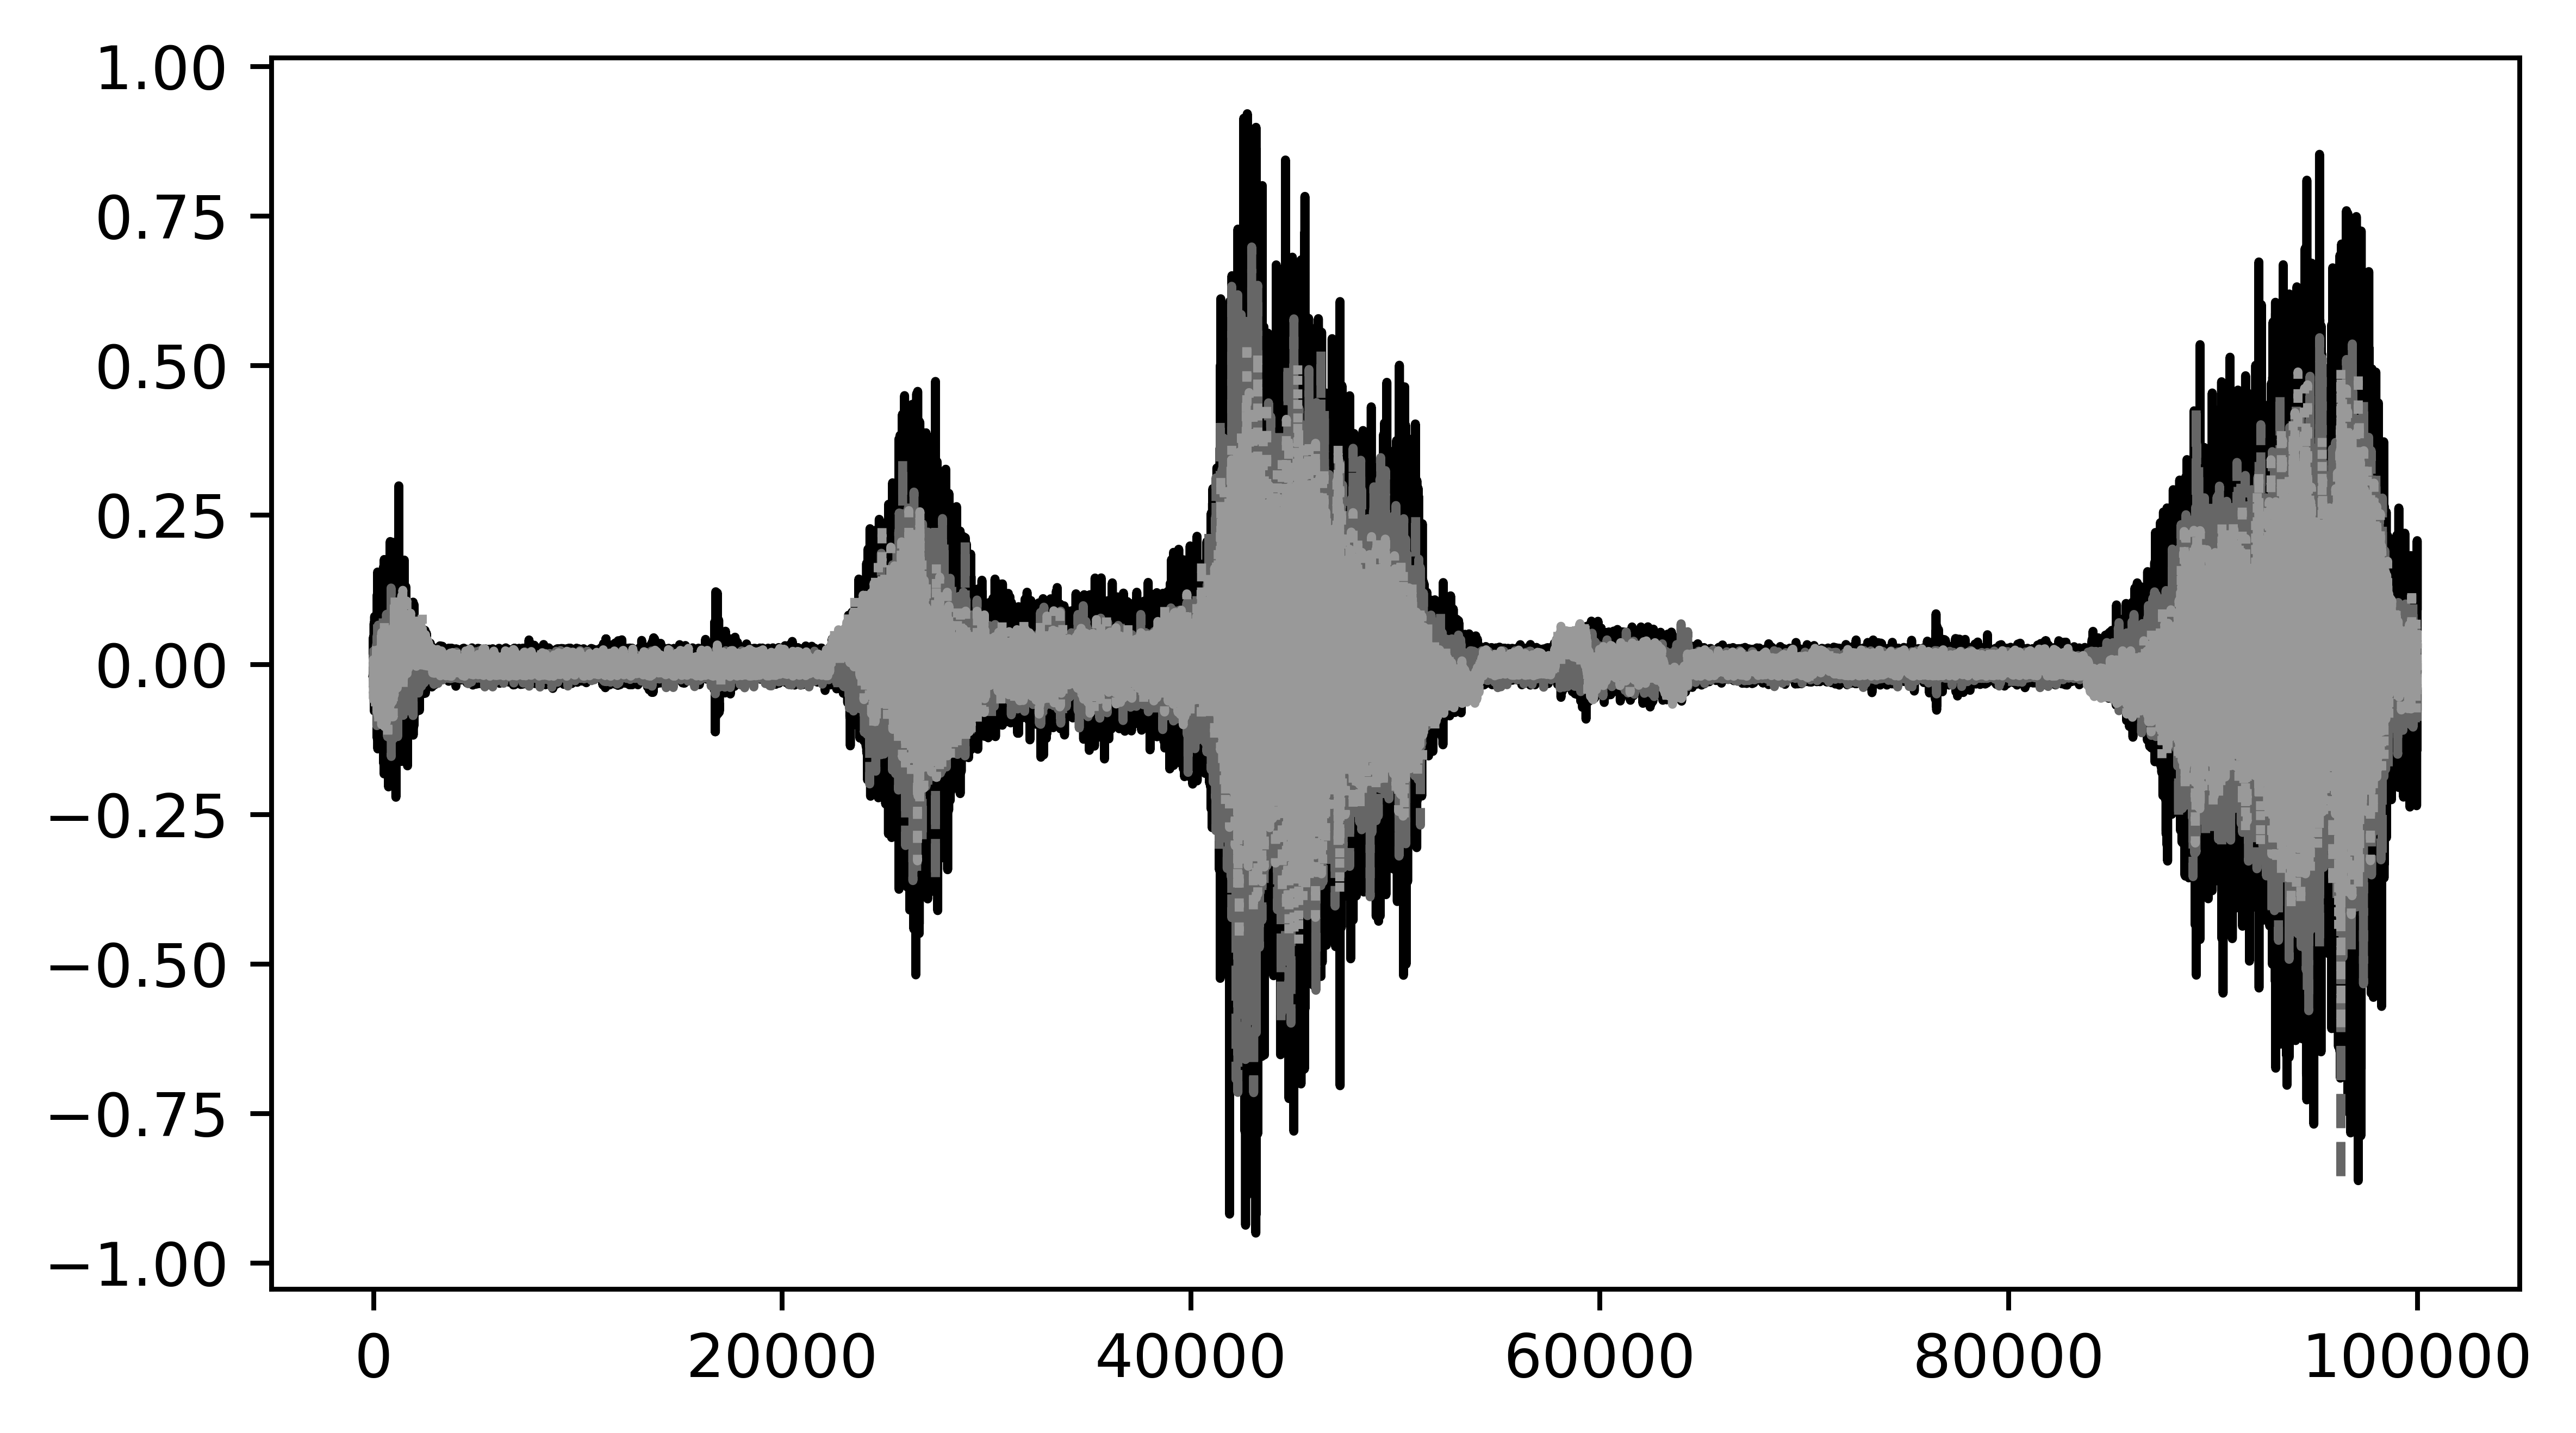

In [44]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(ODataSet[2000000:2100000,4])
plt.plot(ODataSet[2000000:2100000,5])
plt.plot(ODataSet[2000000:2100000,3])
plt.show()


In [30]:
import pywt 
data_in = ODataSet[:,4]
data_in = np.append(data_in, 0)
coeffs = pywt.swt(data_in, 'sym2', level=2)

In [32]:
np.shape(coeffs)

(2, 2, 11745764)

In [31]:
for i in range(5):
    dets = np.asarray(coeffs[(3-1)-i][1])
    dets[:] = 0

IndexError: list index out of range

In [52]:
LbPX = cf.Smoothing(ODataSet[0:2000000,3],2)
LbPY = cf.Smoothing(ODataSet[0:2000000,4],2)
LbPZ = cf.Smoothing(ODataSet[0:2000000,5],2)



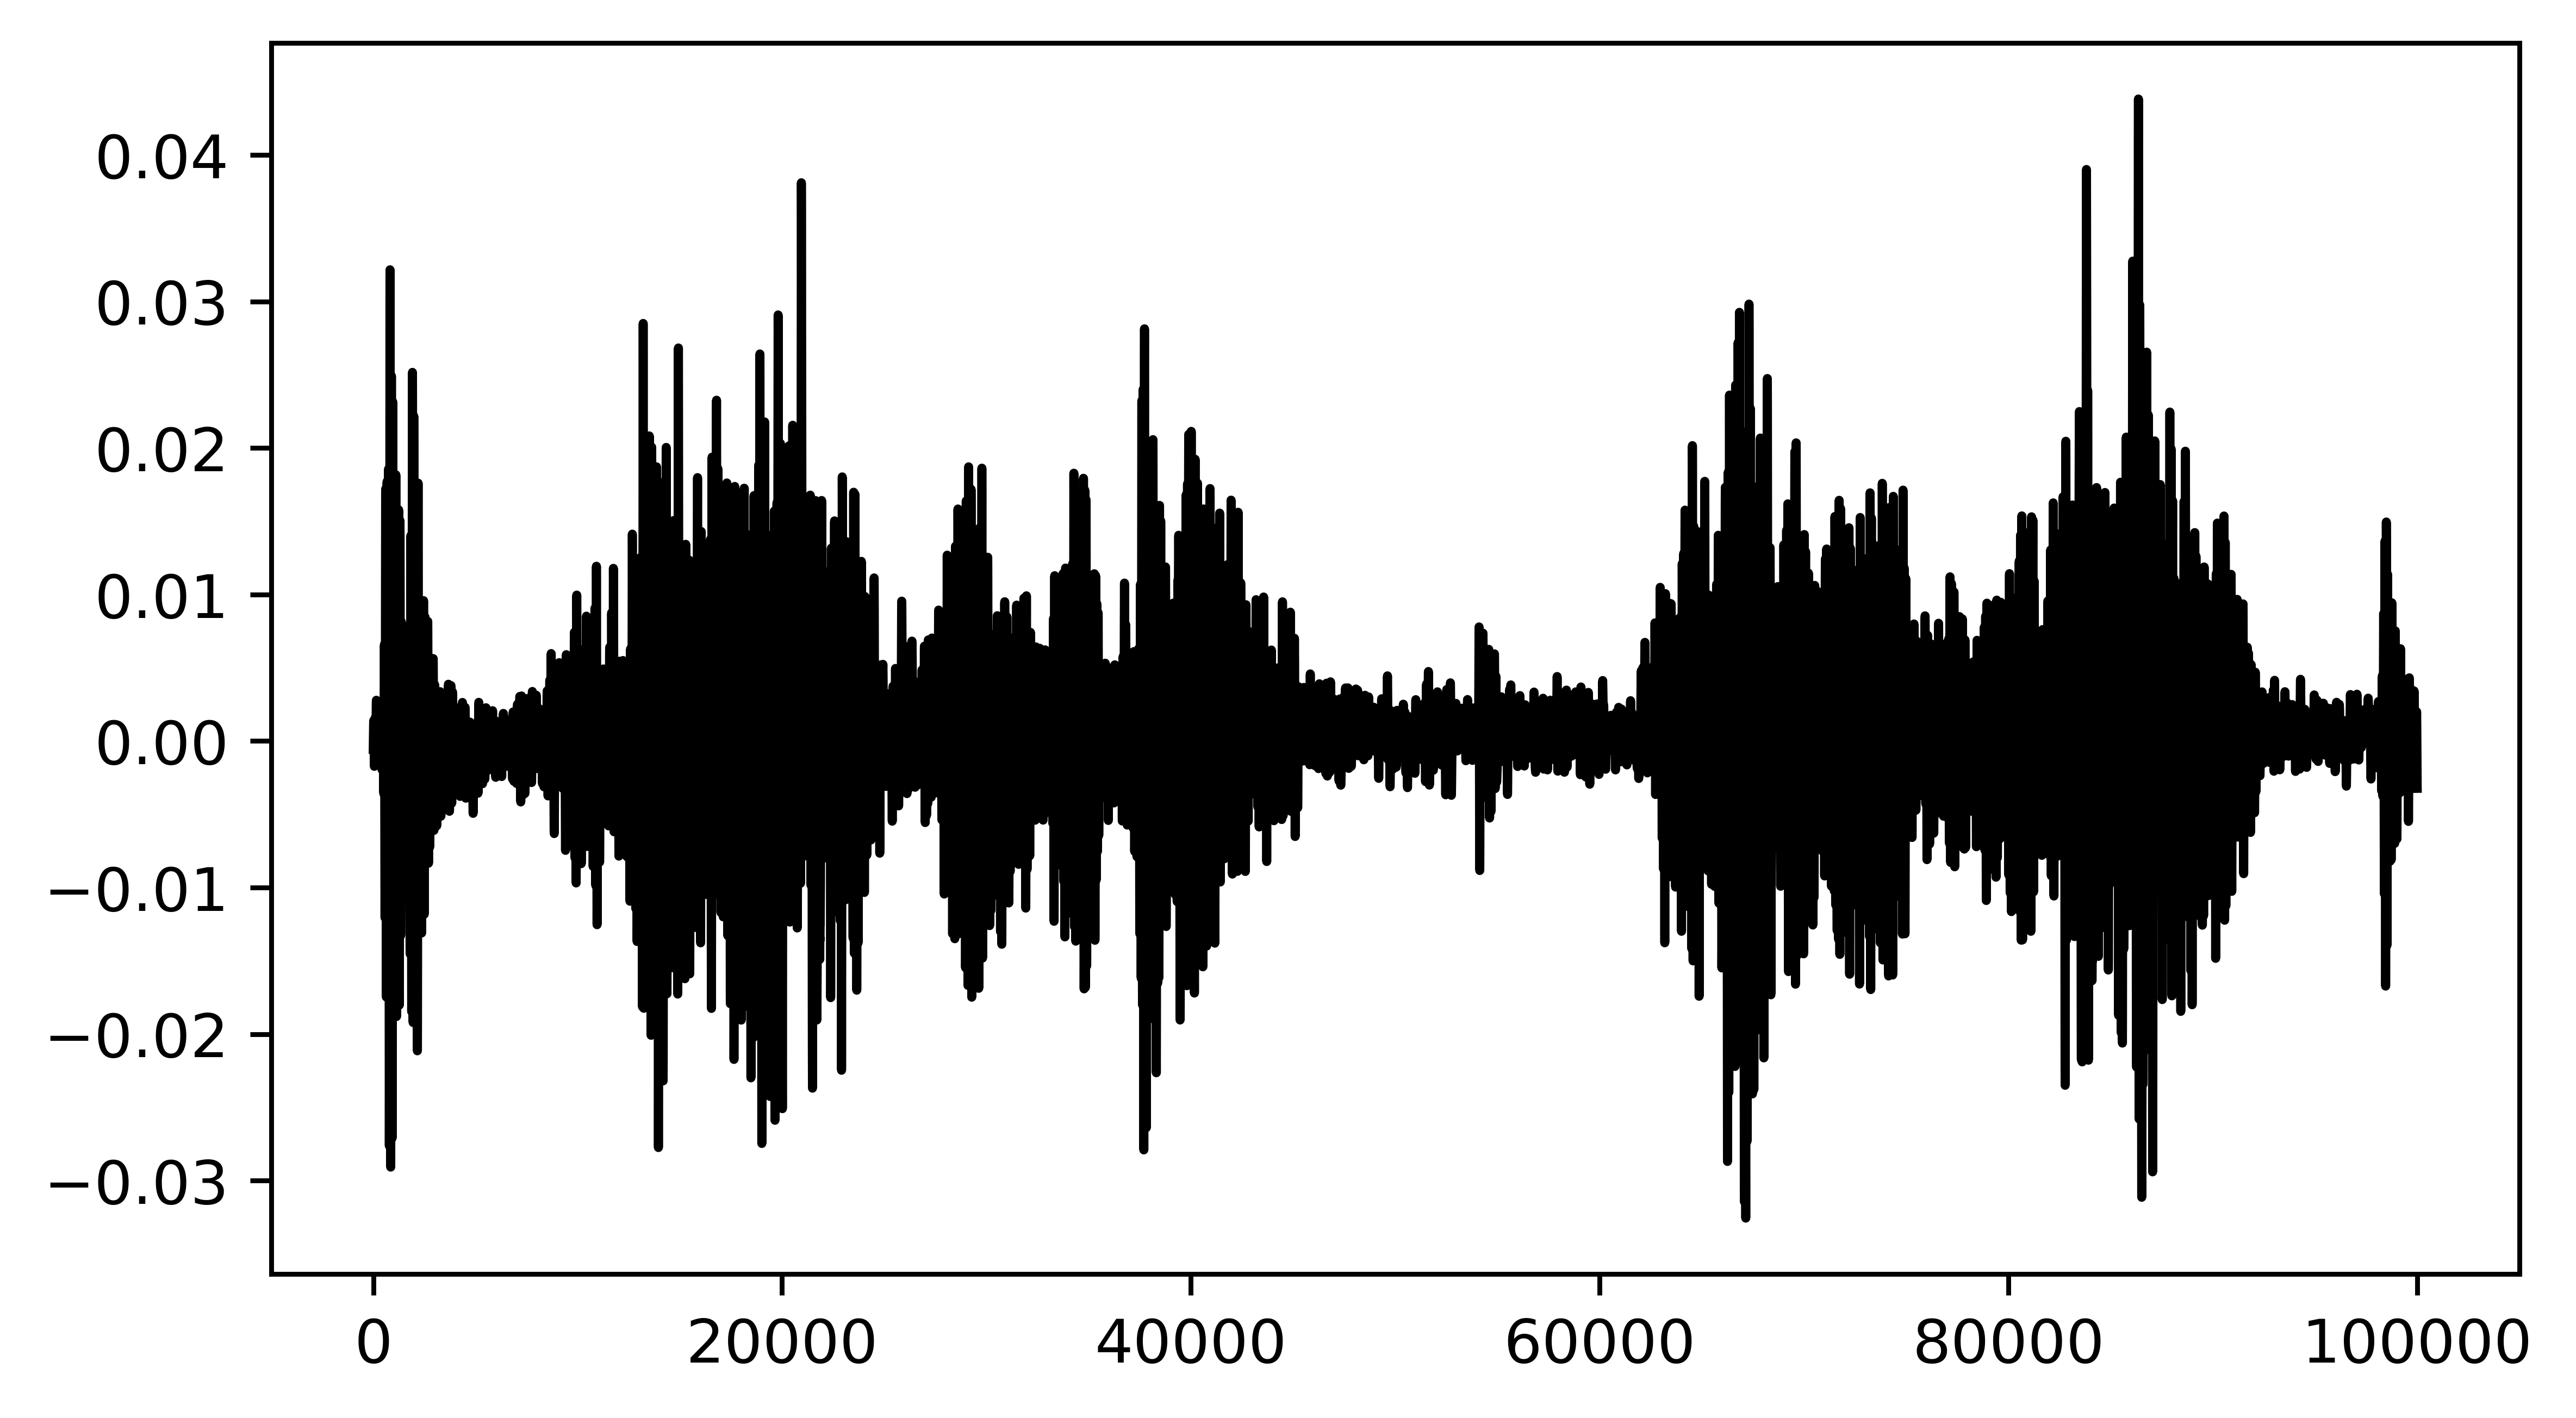

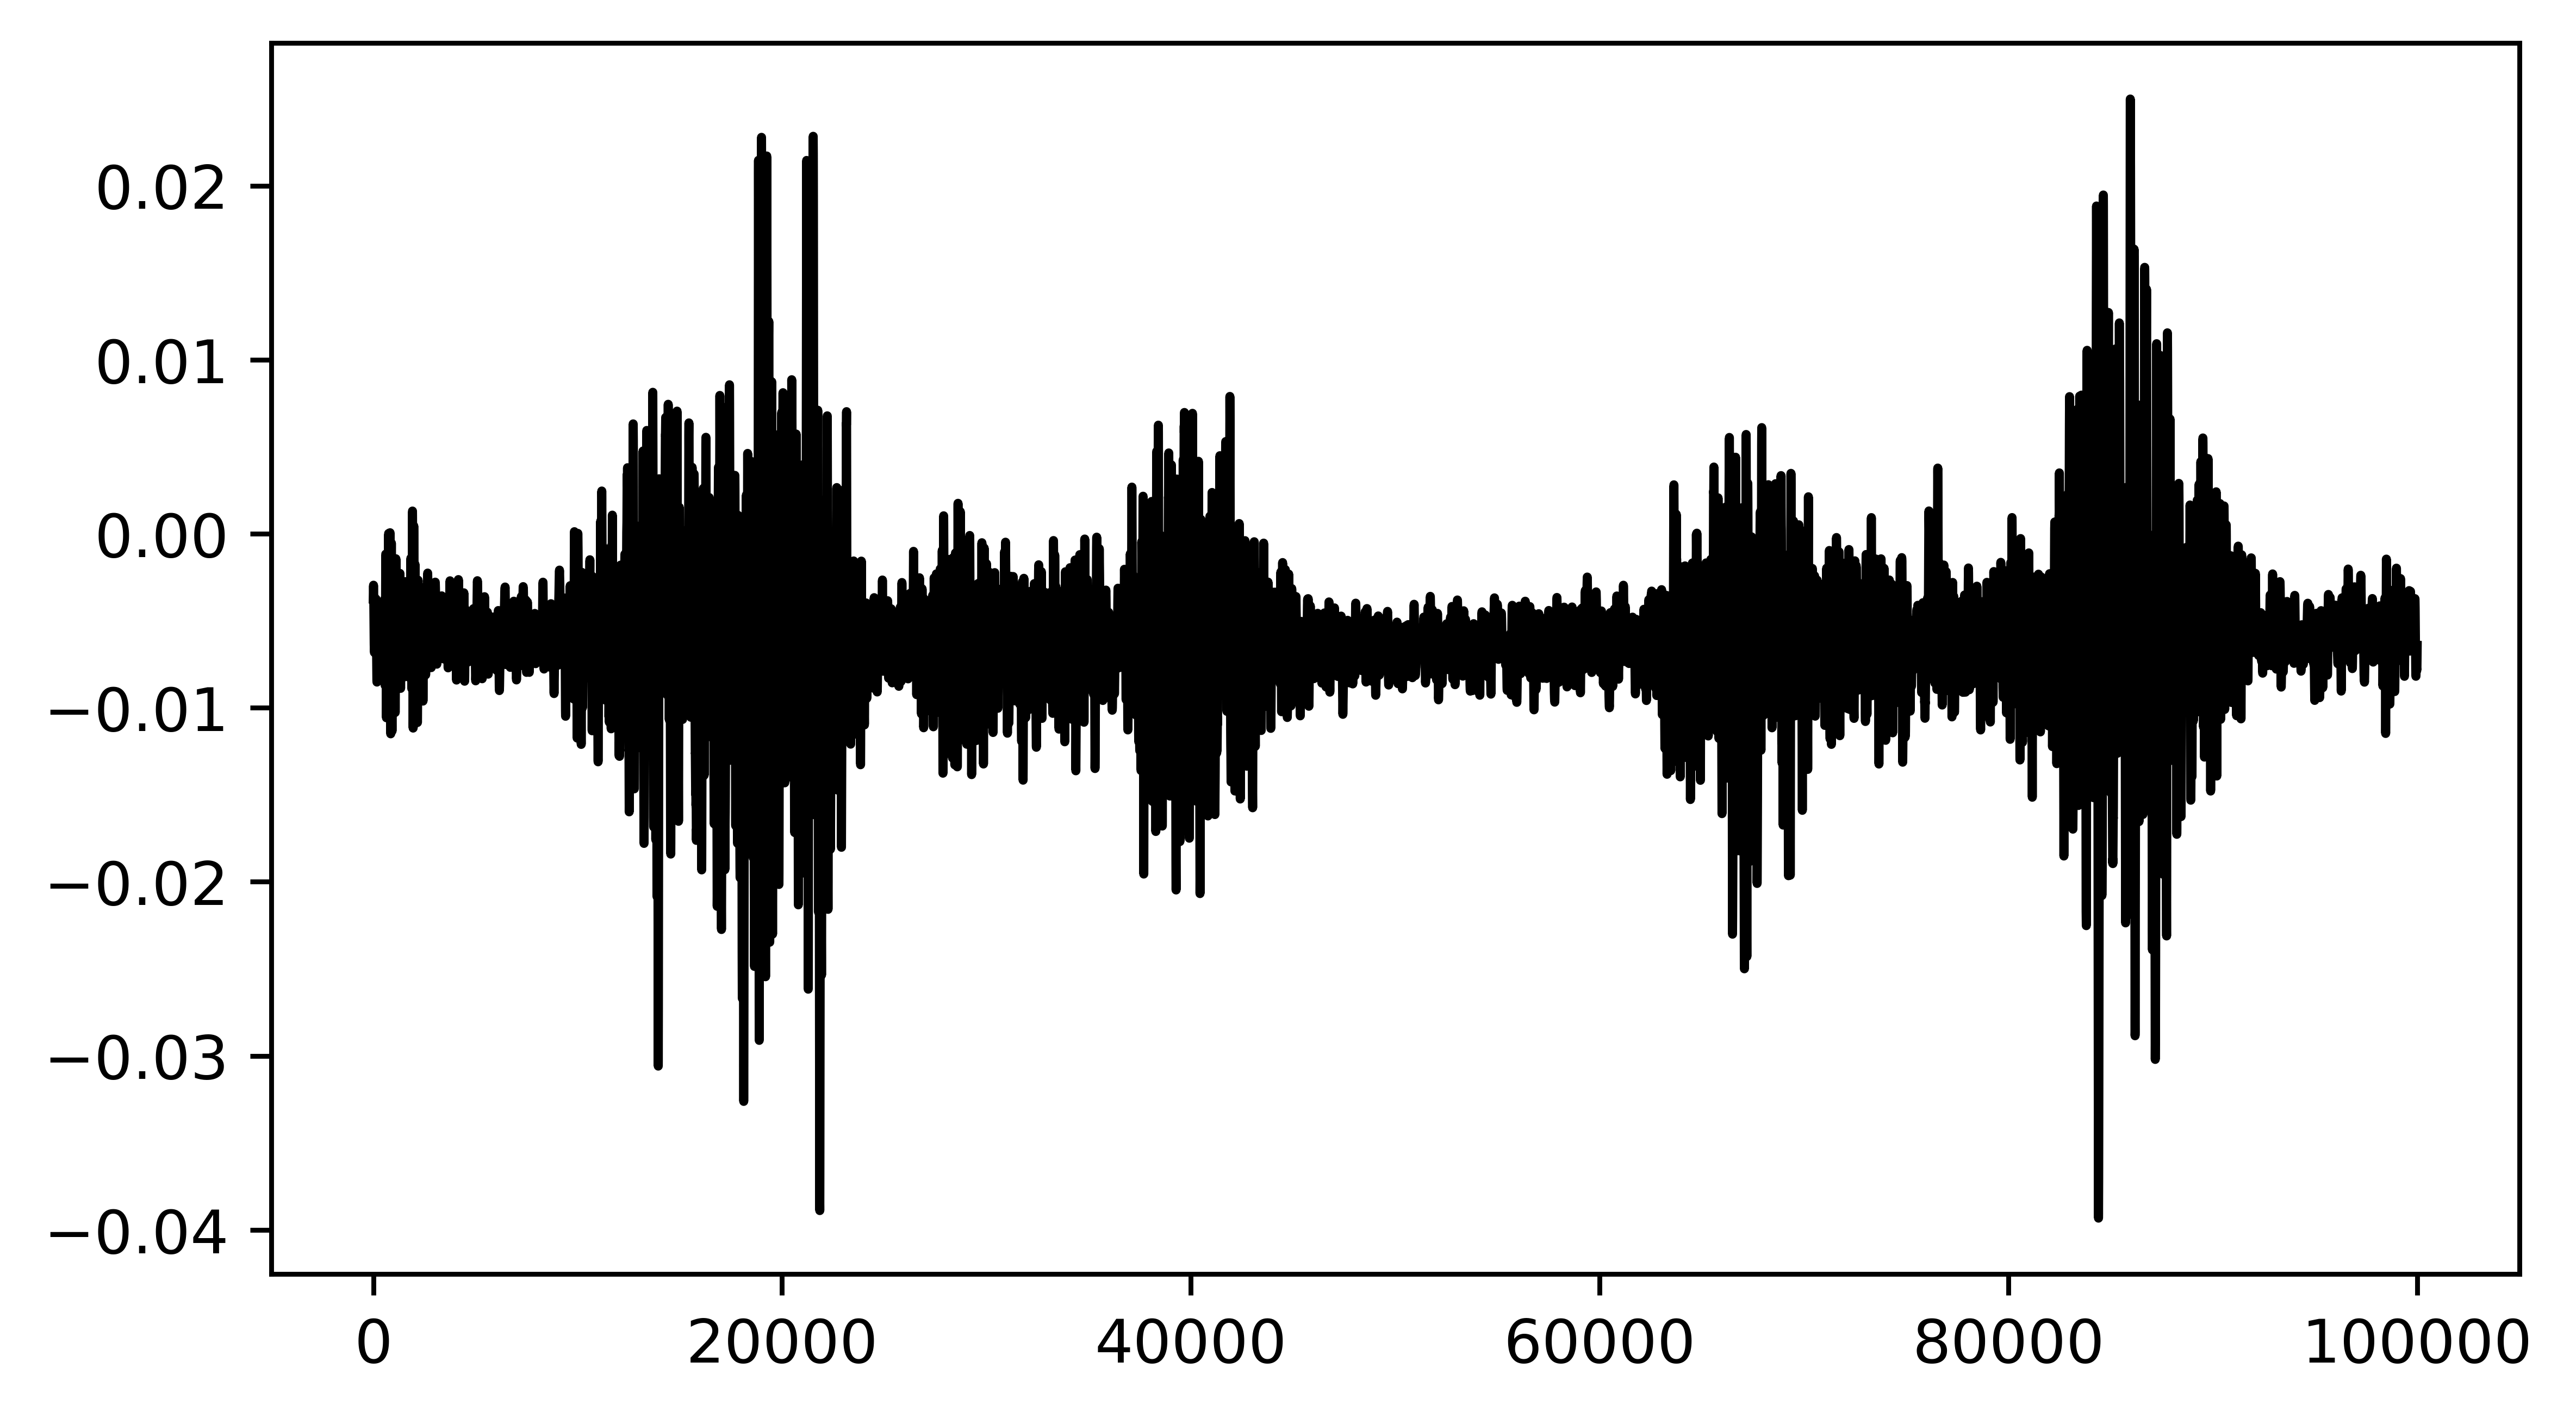

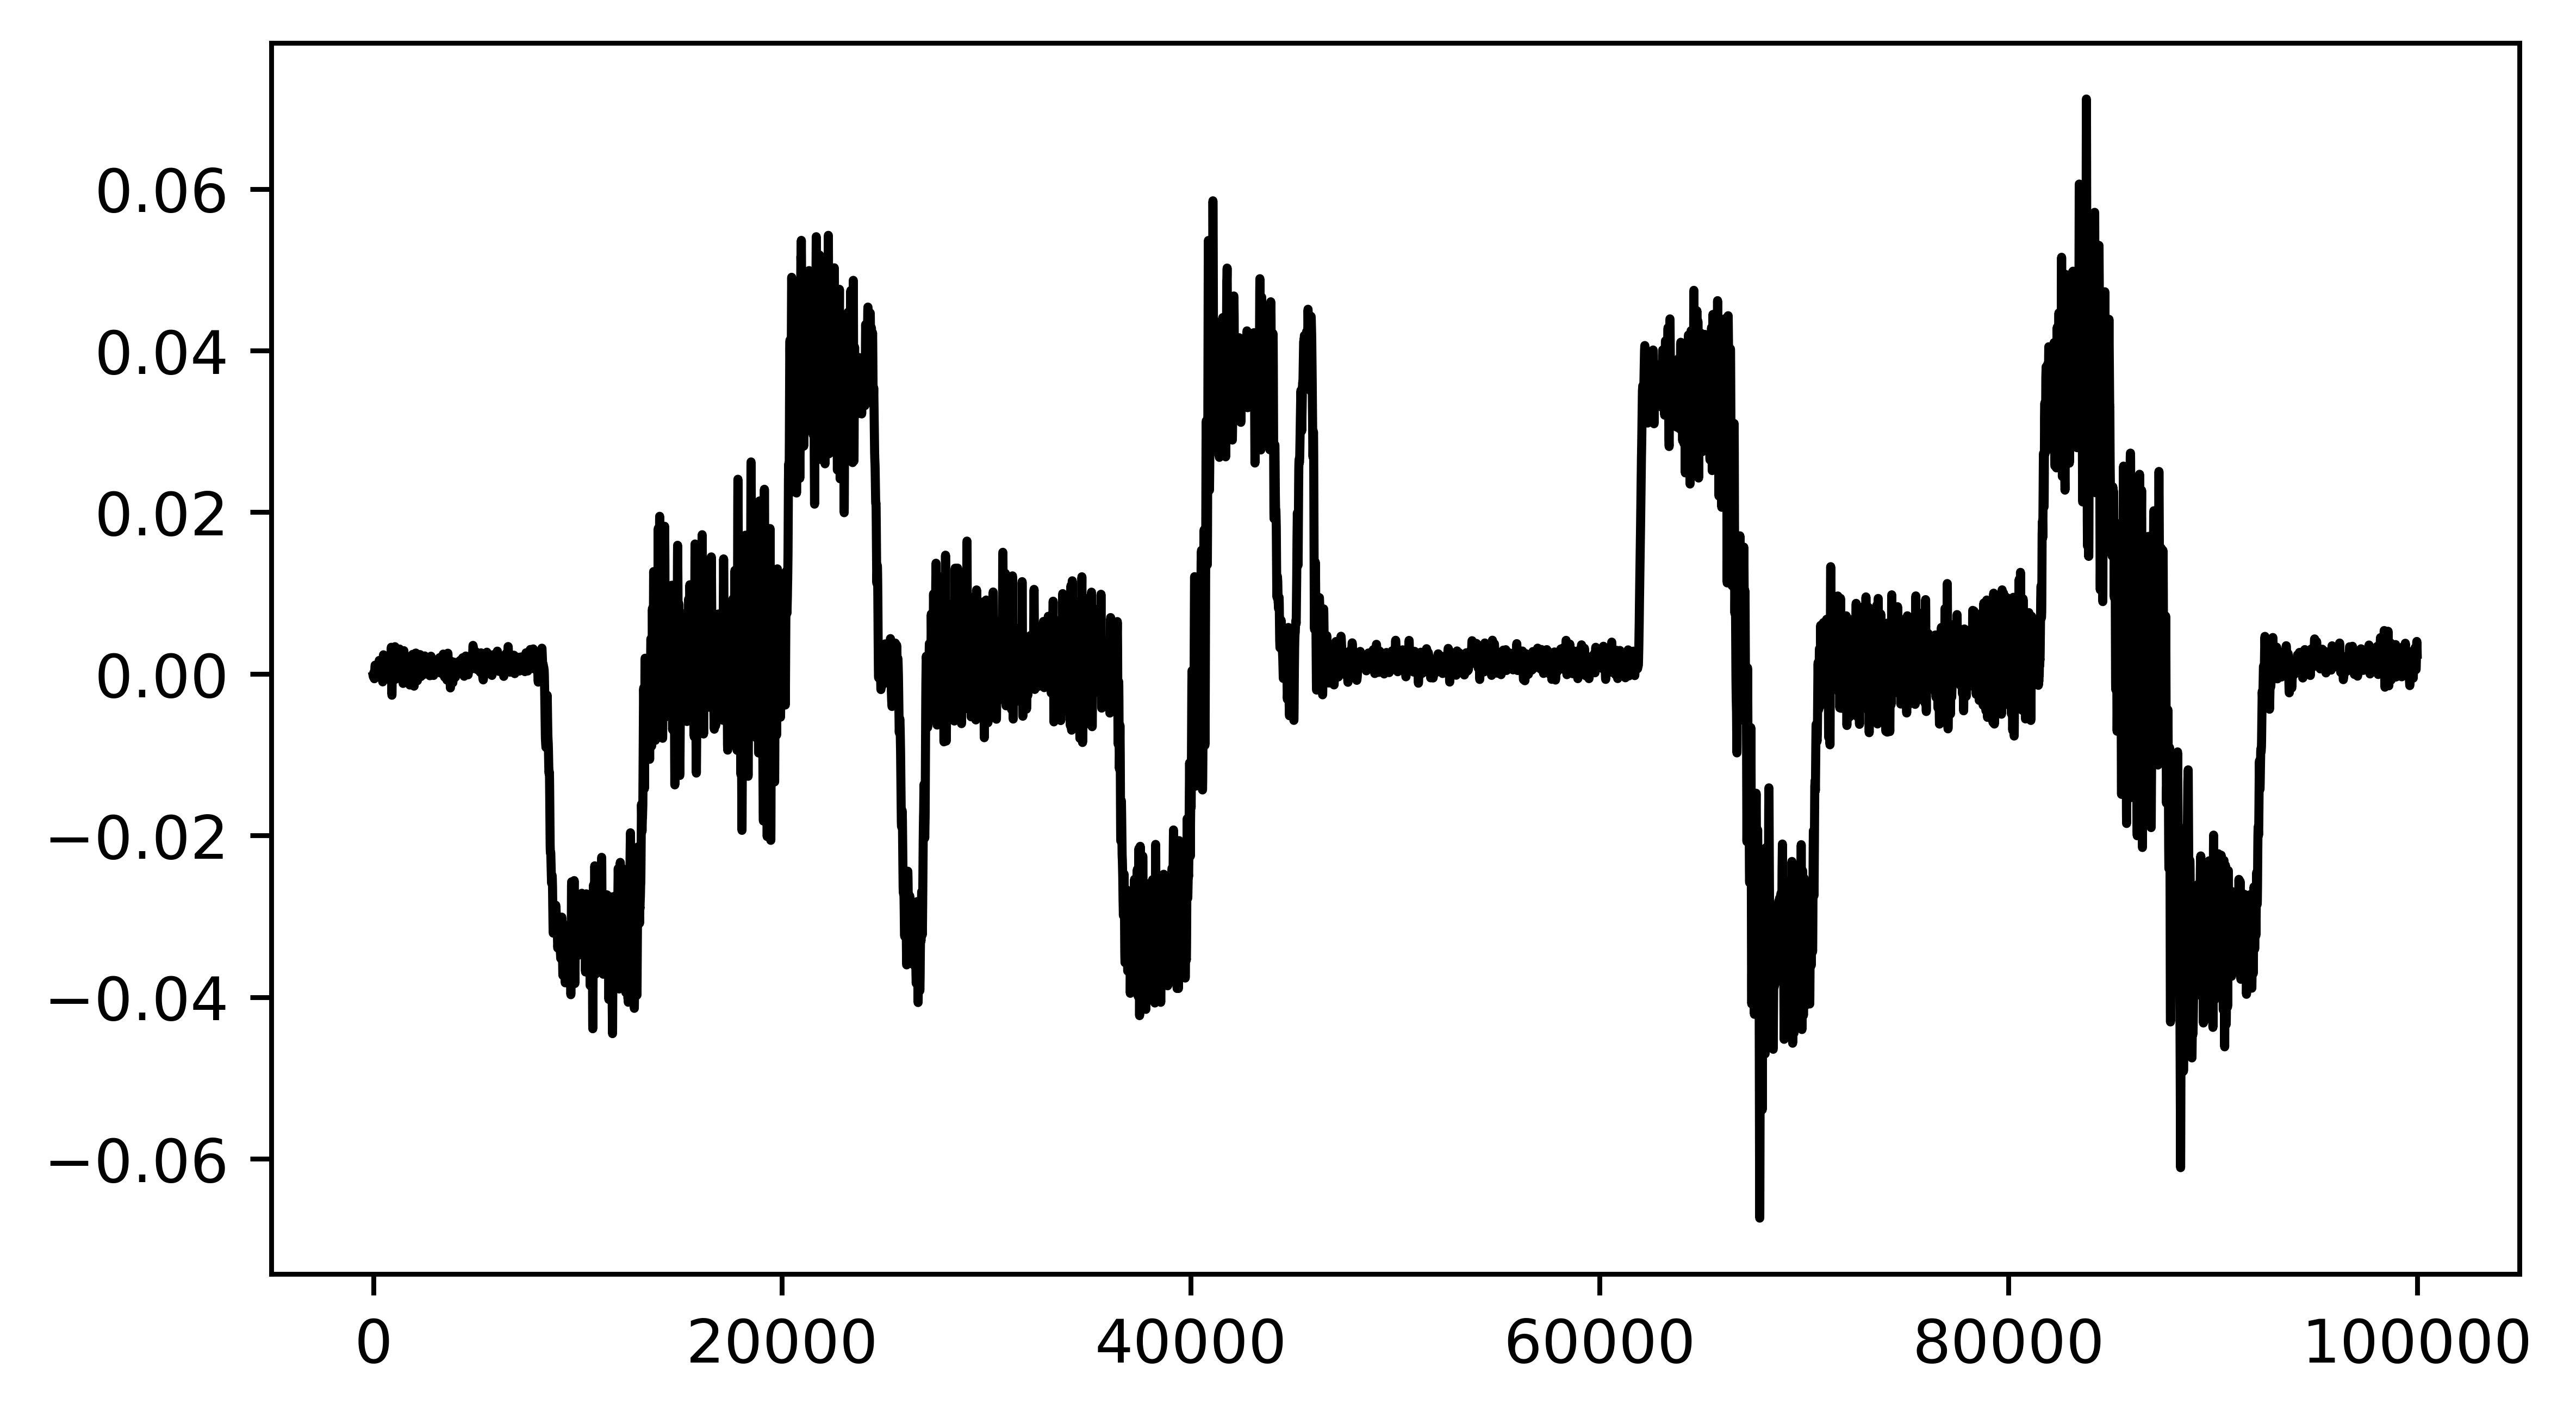

In [58]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(LbPY[1500000:1600000])
plt.show()

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(LbPZ[1500000:1600000])
plt.show()

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(LbPX[1500000:1600000])
plt.show()


In [63]:

def getVelocity(Acceleration, Timestamps = 0.003):
    velocity = np.zeros(len(Acceleration))
    
    if len(Timestamps) == 1:
        dTime = Timestamps
    elif len(Timestamps) == len(Acceleration):
        totTime = 0
        for i in range(len(Timestamps)-1):
            if Timestamps[i]<Timestamps[i+1]:
                totTime += (Timestamps[i+1] - Timestamps[i])
            else:
                totTime += (Timestamps[i+1] - Timestamps[i] + 10000)
        dTime = totTime / len(Timestamps)
    else:
        print('error')

    dTime = dTime / 10000.0

    velocity[0] = Acceleration[0] * (dTime)

    for i in range(len(Acceleration)-1):
        j = i + 1
        velocity[j] = velocity[i] + Acceleration[j] * dTime

    return velocity


    

In [86]:
Vs = getVelocity(LbPX[1500000:1600000], ODataSet[1500000:1600000,2])


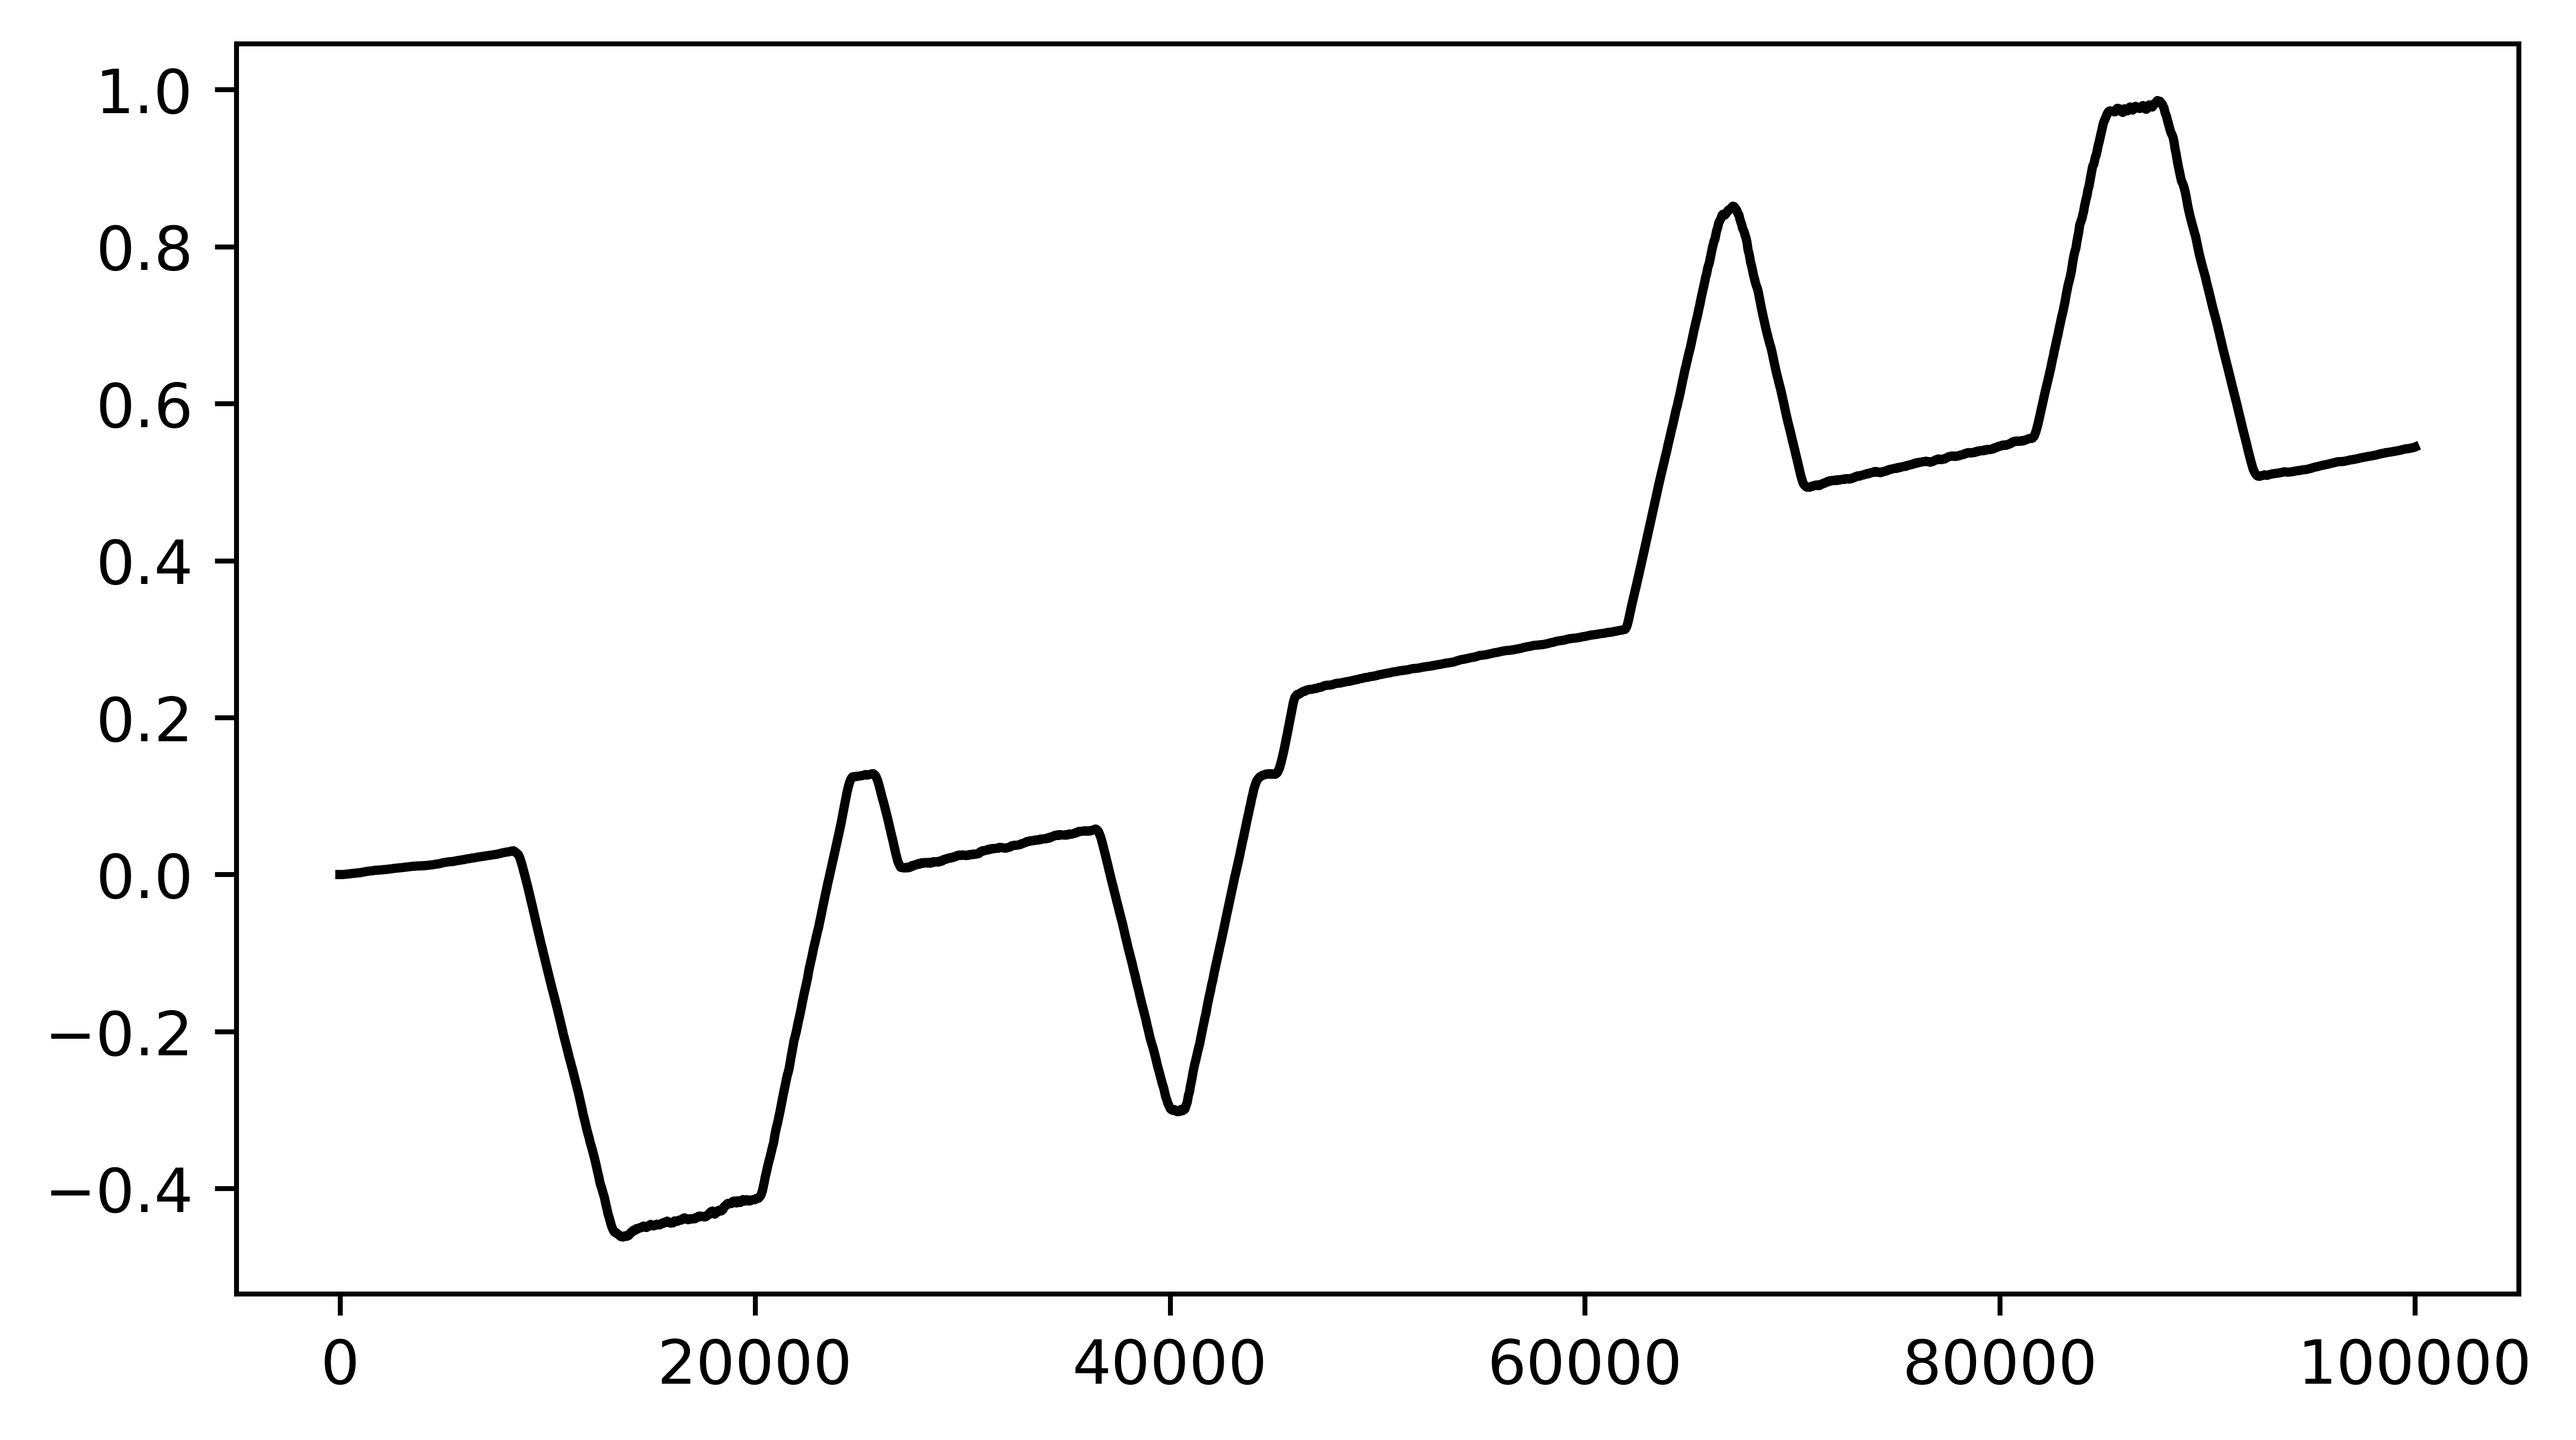

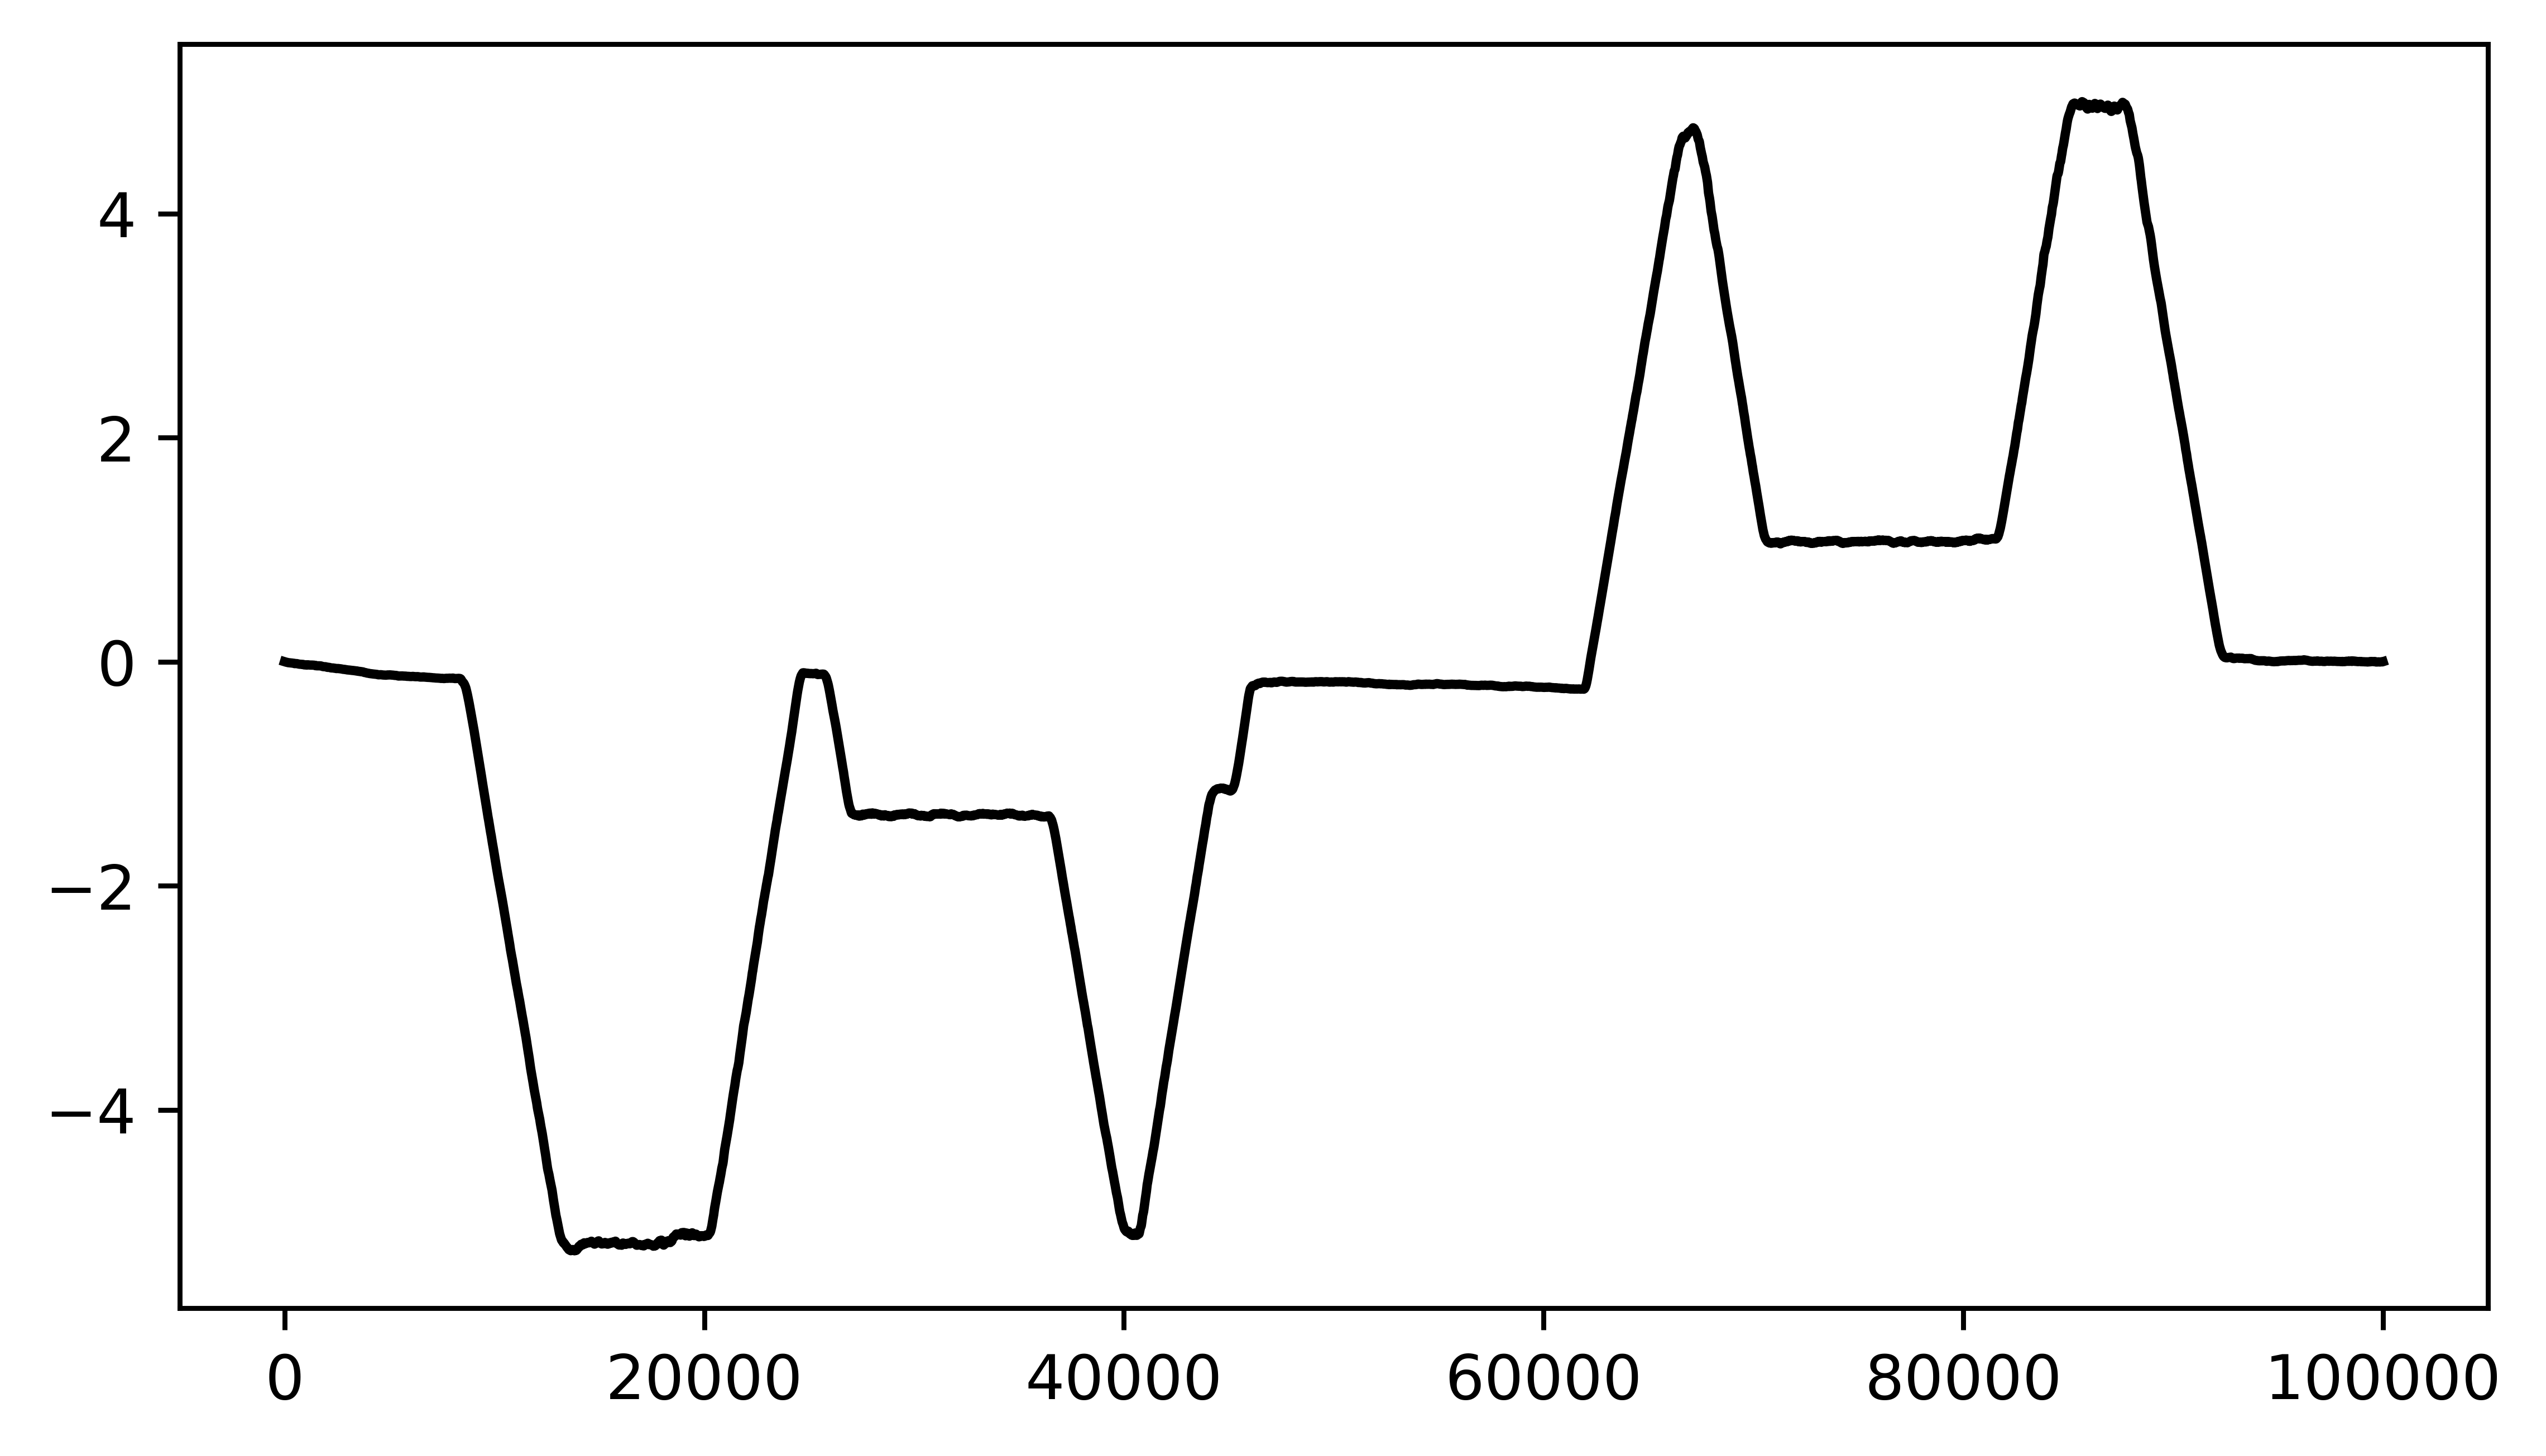

In [87]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(Vs)
plt.show()

PointVairance = Vs[-1:] / len(Vs)
for i in range(len(Vs)):
    Vs[i] -=  PointVairance * i
Vs *= 9.81

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(Vs)
plt.show()

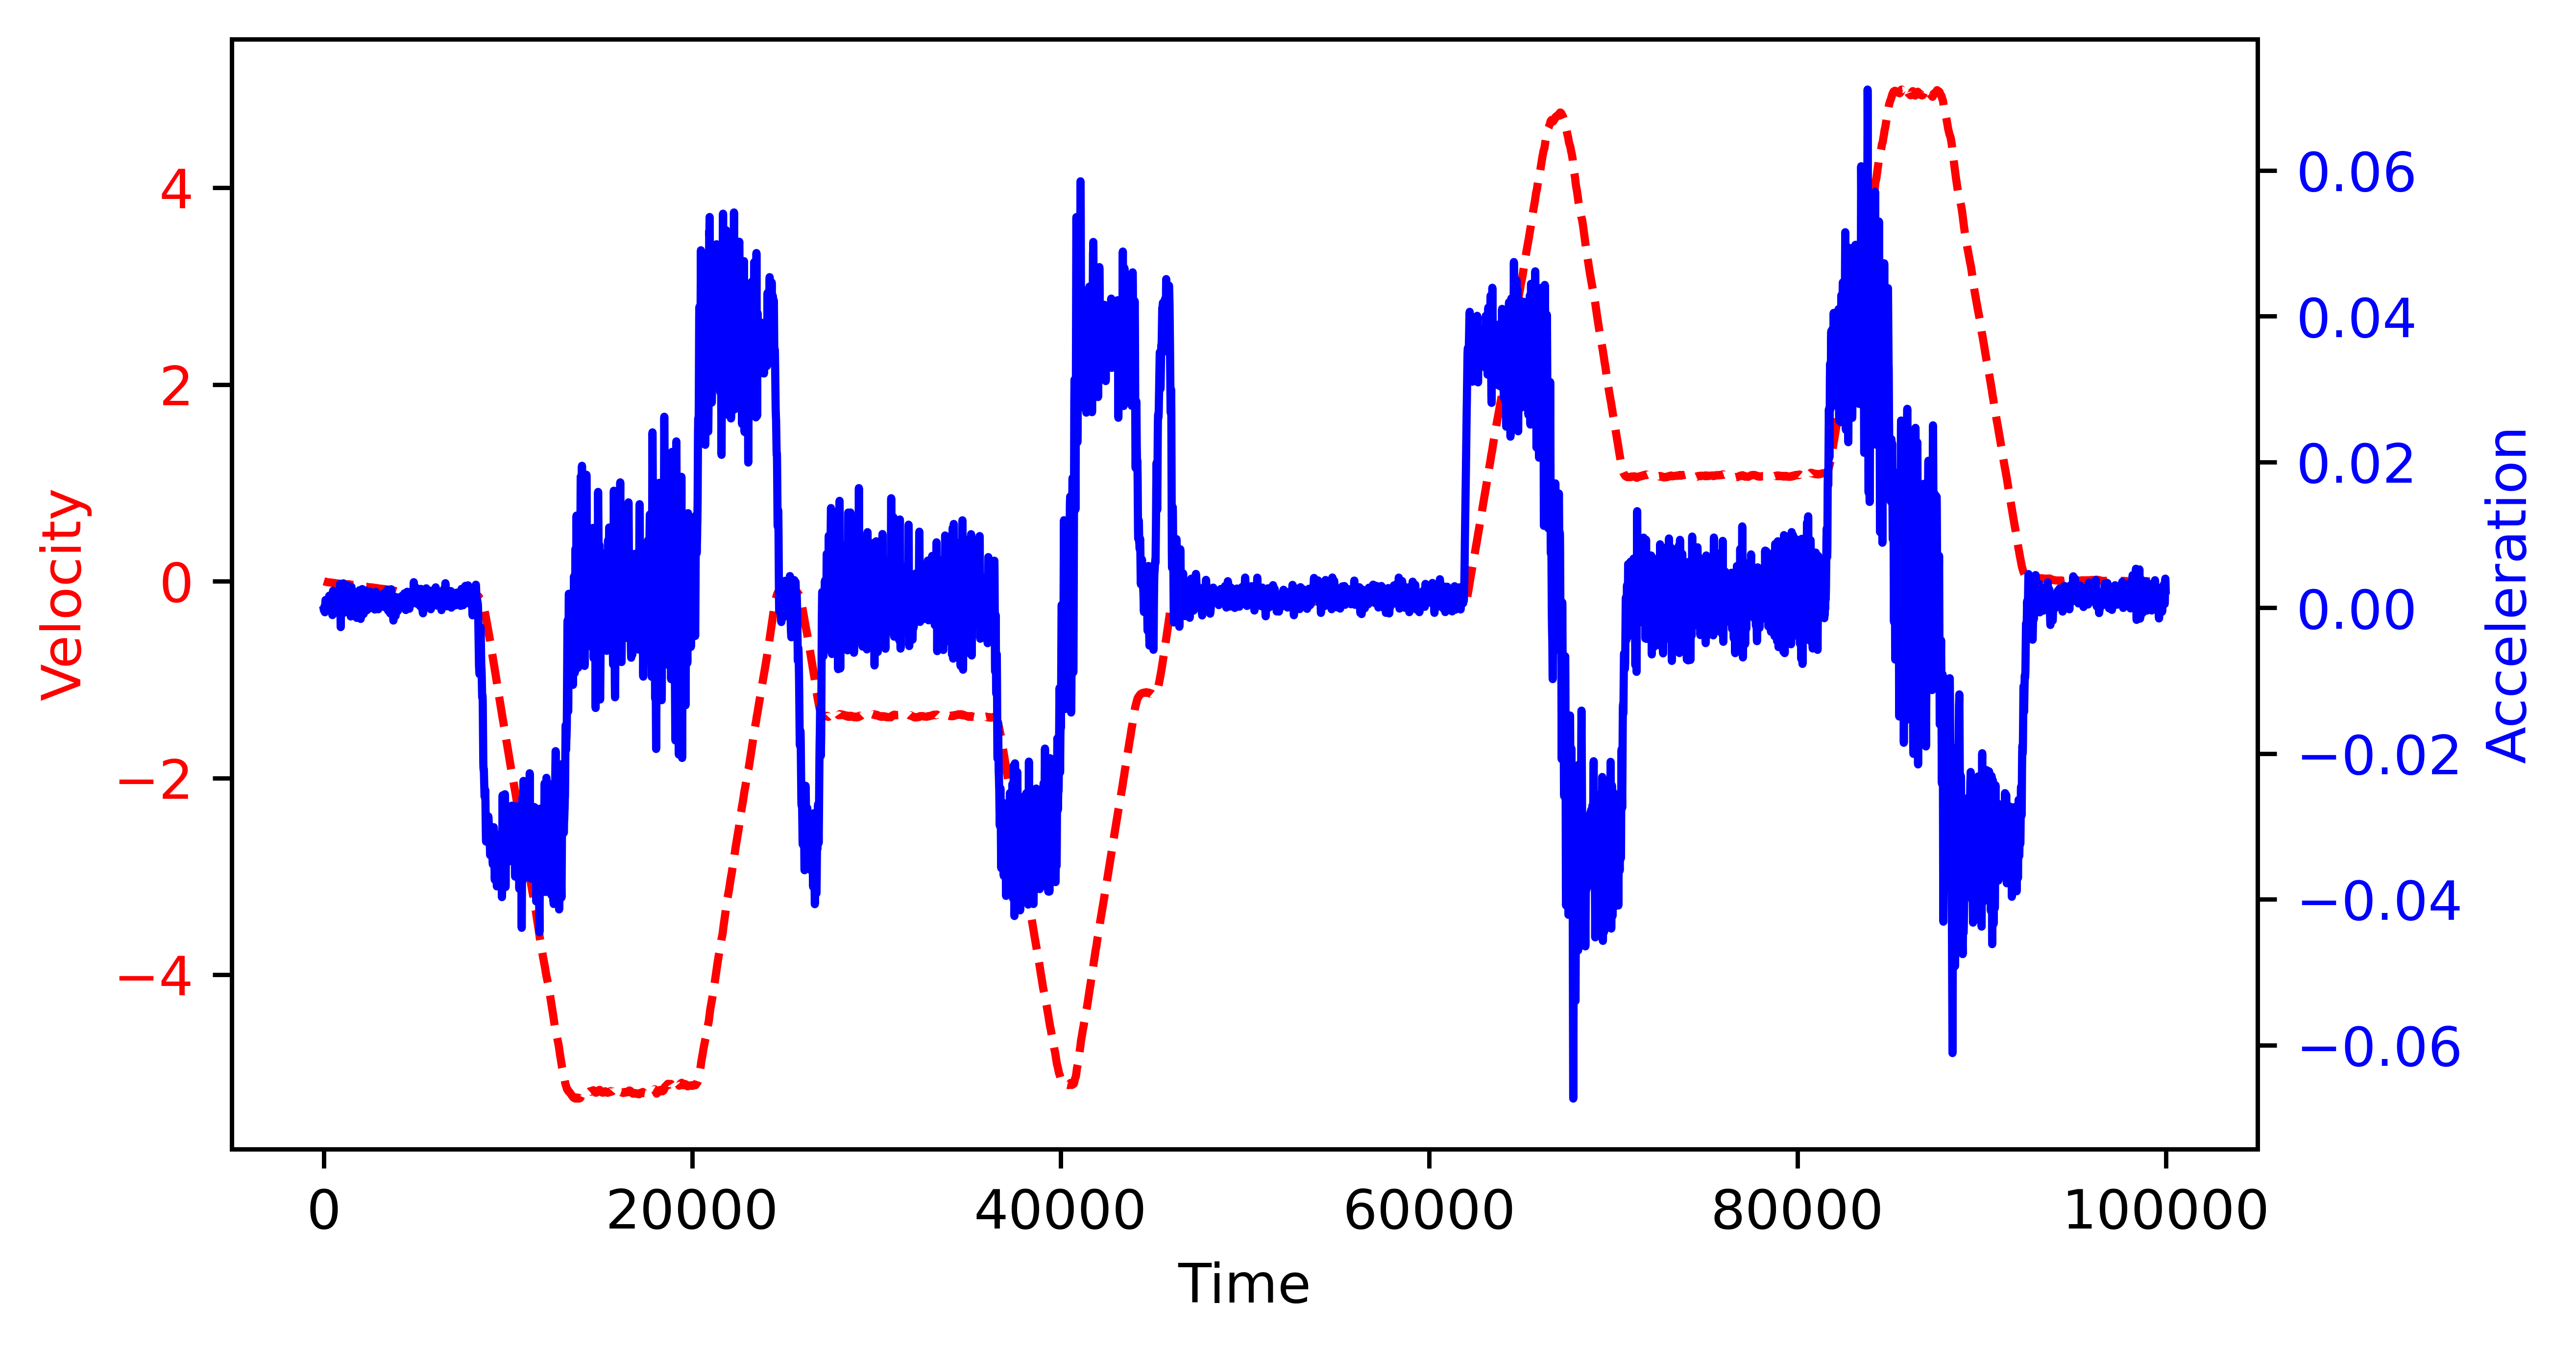

In [89]:
fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 
  
ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red') 
ax1.plot(range(len(Vs)), Vs, color = 'red', linestyle = 'dashed' )
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Acceleration', color = 'blue') 
ax2.plot(range(len(Vs)), LbPX[1500000:1600000], color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()


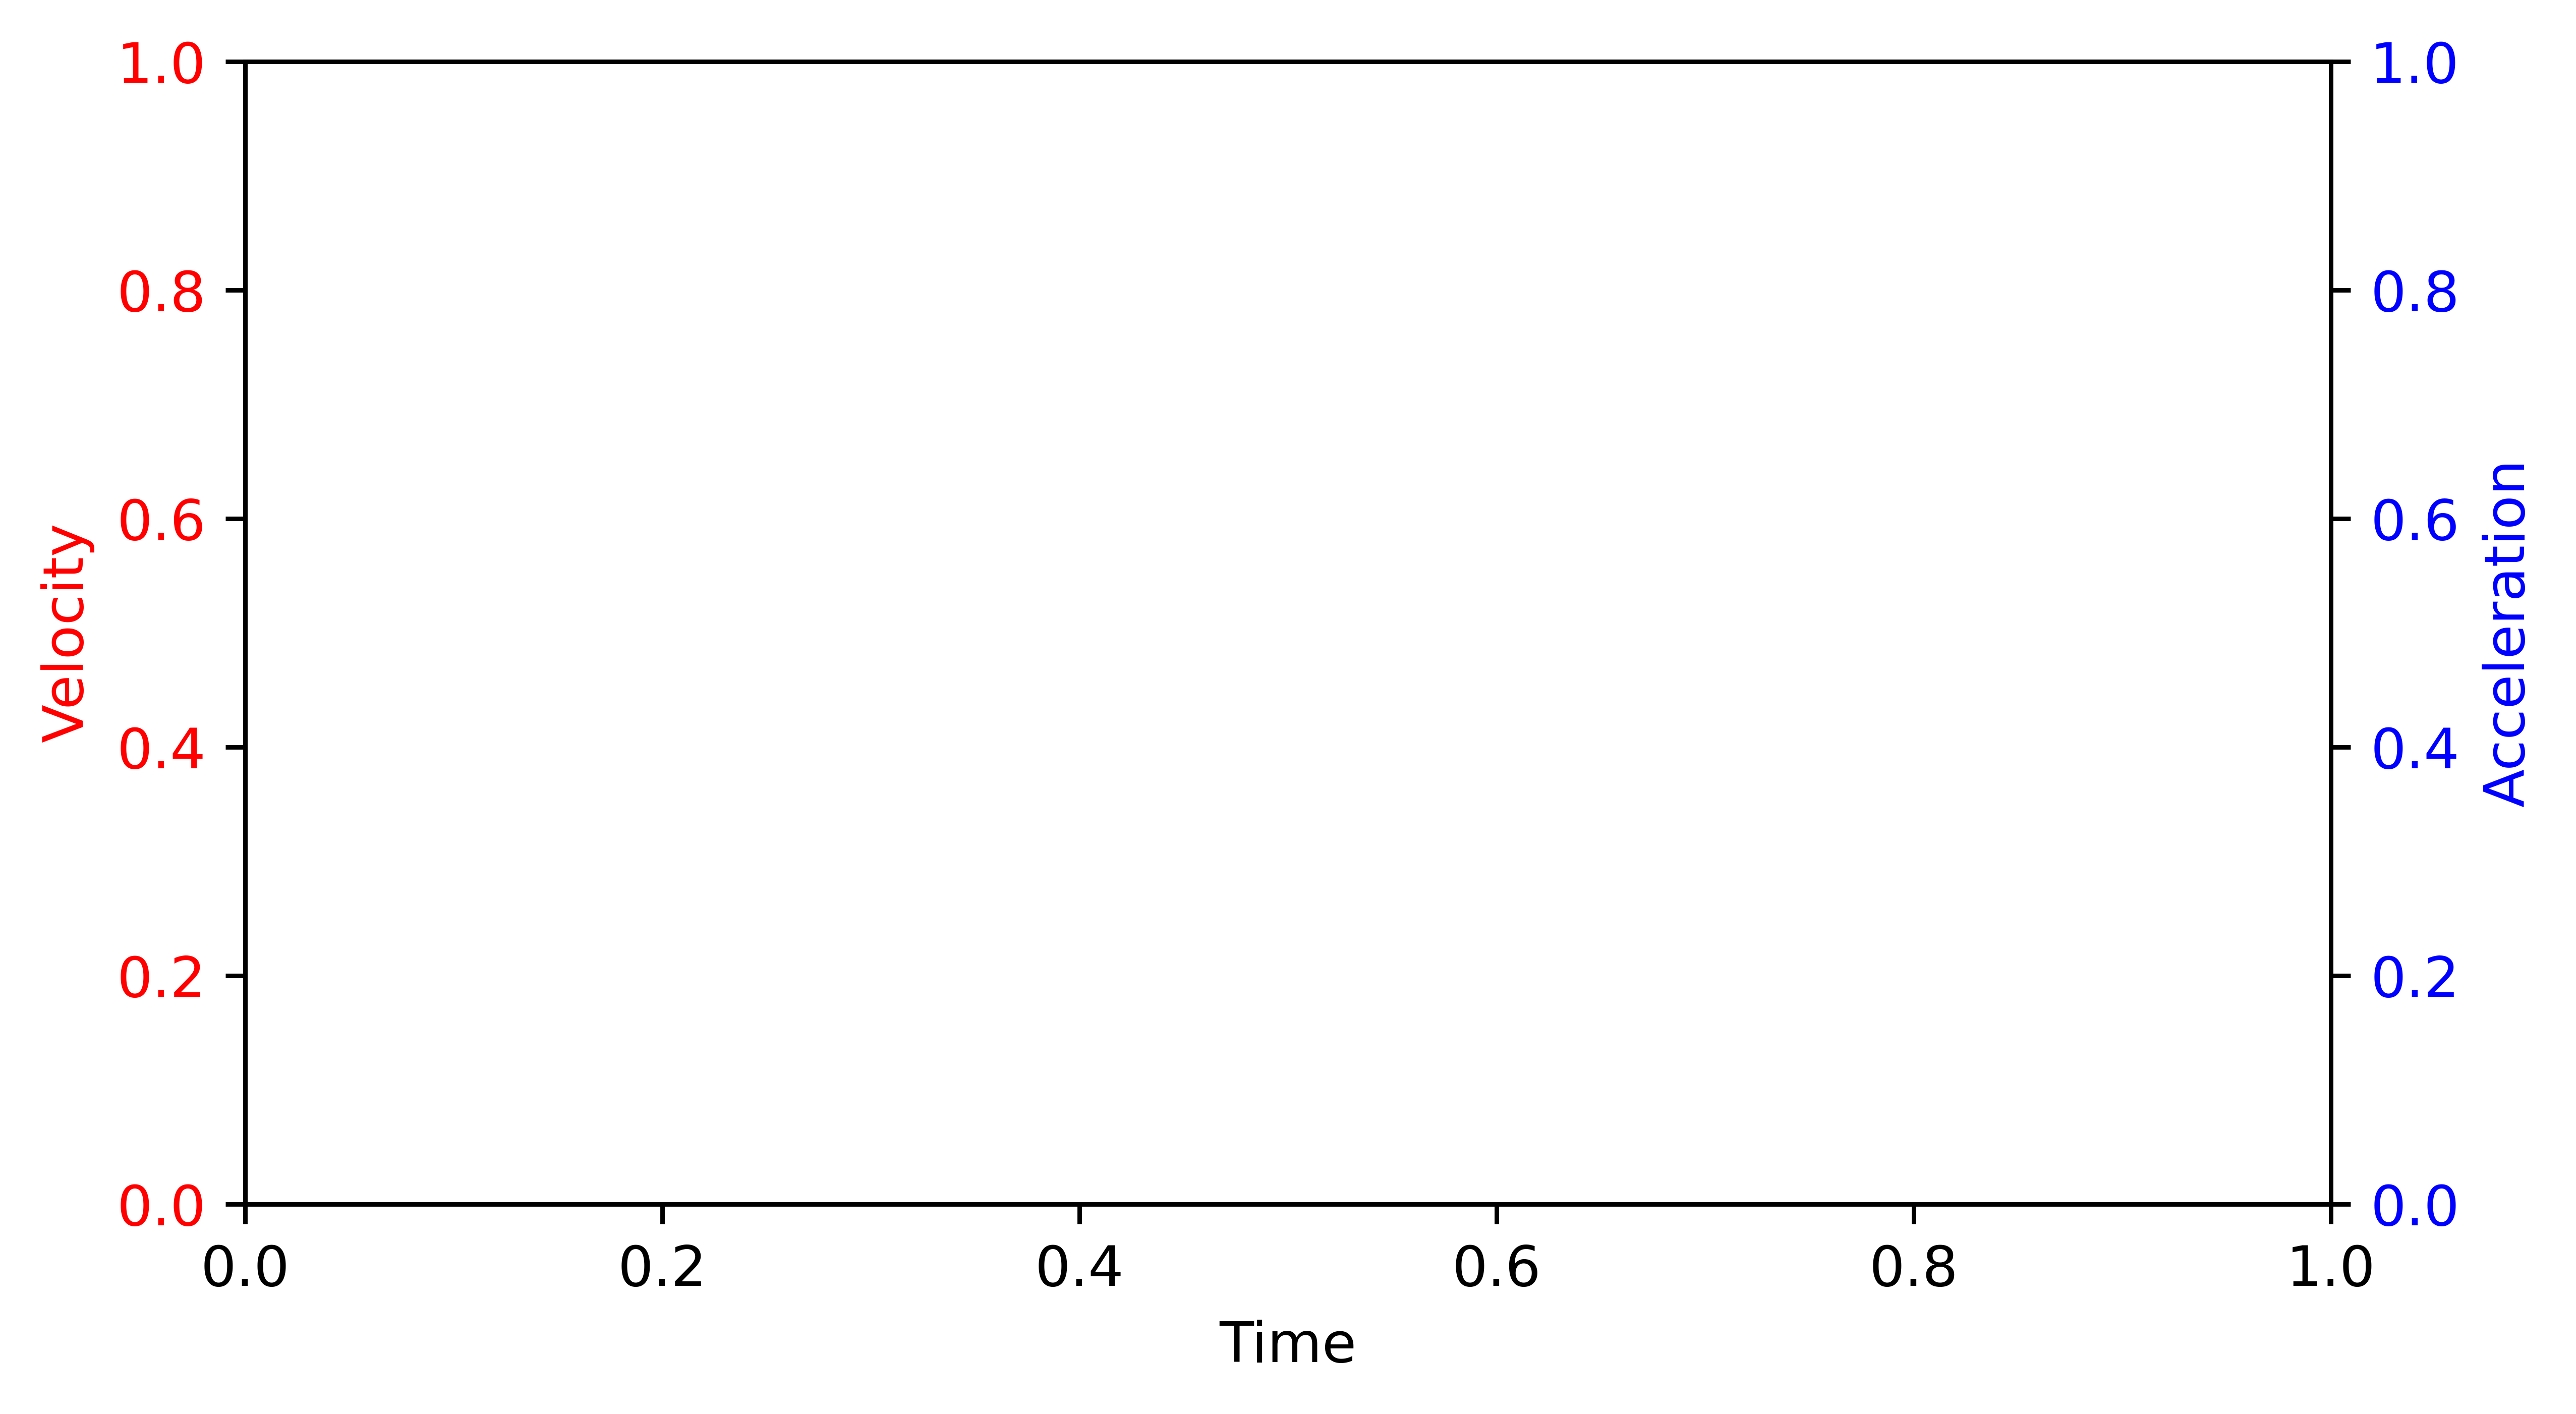

In [94]:
Step = 50000
ZoomSize = 100000

fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 
ax2 = ax1.twinx() 

ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red')     
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
ax2.set_ylabel('Acceleration', color = 'blue') 

def animate(i):
    start = i * Step
    end = start + ZoomSize 
    
    LbPX = cf.Smoothing(ODataSet[start:end,3],2)
    Vs = getVelocity(LbPX, ODataSet[start:end,2])

    PointVairance = Vs[-1:] / len(Vs)
    for i in range(len(Vs)):
        Vs[i] -=  PointVairance * i
    Vs *= 9.81

    ax1.plot(range(len(Vs)), Vs, color = 'red', linestyle = 'dashed' )
    ax2.plot(range(len(Vs)), LbPX, color = 'blue') 

    plt.title('Data Points ' +str(start) + ' : ' + str(end))
    
    #time.sleep(1)
    return ax1, ax2



In [92]:
import matplotlib.animation as ani


In [95]:

anim = ani.FuncAnimation(fig, animate, frames=(np.shape(ODataSet)[0] - 1))

anim.save('animation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:


        #for i in range(int(length/size)):
        for i in range(3):
            # StdDev = np.zeros(length)
            # StdDevSmooth = np.zeros(length)
            coord = i+2
            
            SmoothRDataSet[0] = 0
            SmoothXDataSet[0] = 0
            # StdDev[0]=0
            # StdDevSmooth[0]=0

            fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)

            #factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            #TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            #TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            #for j in range(Arange-1):
            #    k = j+2
            #    TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            #for j in range(length-Arange):
            #    k = (length-1)-j
            #    TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                smooth[k,i] = np.average(ODataSet[0:k,coord])
                #SmoothXDataSet[k] = np.average(ODataSet[0:k,coord])
                #StdDev[k]=st.stdev(ODataSet[0:k,coord])
                #StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
                #SmoothRDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                smooth[k,i] = np.average(ODataSet[k-Arange:k,coord])
                #SmoothXDataSet[k] = np.average(ODataSet[k-Arange:k,coord])
                #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
                #StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
                #SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
            
            plt.plot(ODataSet[:,coord], label = 'Original ' + Header[coord])
            plt.plot(smooth[:,i], label = 'Smooth ' + Header[coord])
            #plt.plot(SmoothXDataSet[:], label = 'Smooth ' + Header[coord])
            #plt.plot(TdDataSet[start:end]) #, label = 'Smoothed Signal')
            #plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            #plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')
            
            plt.title(Filename + Header[coord])
            if Saving: plt.savefig(location+Filename+Header[coord].replace(" ", "").replace(":", "").replace(",", "")+FFormat)
            plt.show()
            #print(title,max(StdDev),max(SmoothXDataSet[start:end]))
        
        # title = Filename #+ ' ' + Header[coord]
        # if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        
        # if Ledgends: plt.legend()
        # if Titles: plt.title(title)
        
        # plt.show()
        
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

Saving = True
Titles = True

In [ ]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [ ]:
#trys = ['coif1','coif2','mexh','gaus2','dmey','gaus1','morl','cgau1','cgau2','db1','db2','sym1','sym2','sym3']
#trys = ['coif2','mexh','gaus2','db1','sym2']
#trys = ['gaus2'] #,'gaus1','gaus2','gaus3','gaus5']
wvlt = 'gaus2'

Titles = False
Saving = True

Saving = False
Titles = True

start = 1400
end = 3100
coord = 1
scales = 50
slices = 20
trim = 100

#for segmenets in range(24):
#    start = segmenets * 2500
#    end = start + 5000
#for id in trys:
    #try:
#        for cord in range(1):
#           coord = cord + 1
            #PlotFingerPrint(ODataSet[start:end,coord],'a','Raw data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(SmoothDataSet[start:end,coord],'a','Smoothed data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDev[start:end],'a',id + 'StdDev from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDevSmooth[start:end],'a',id + 'Wavelet from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(TdDataSet[start:end],'a',id + 'Wavelet on r series from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(SmoothDataSet[start:end],'a','Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            
    #except:
#        print(id)

1700 50


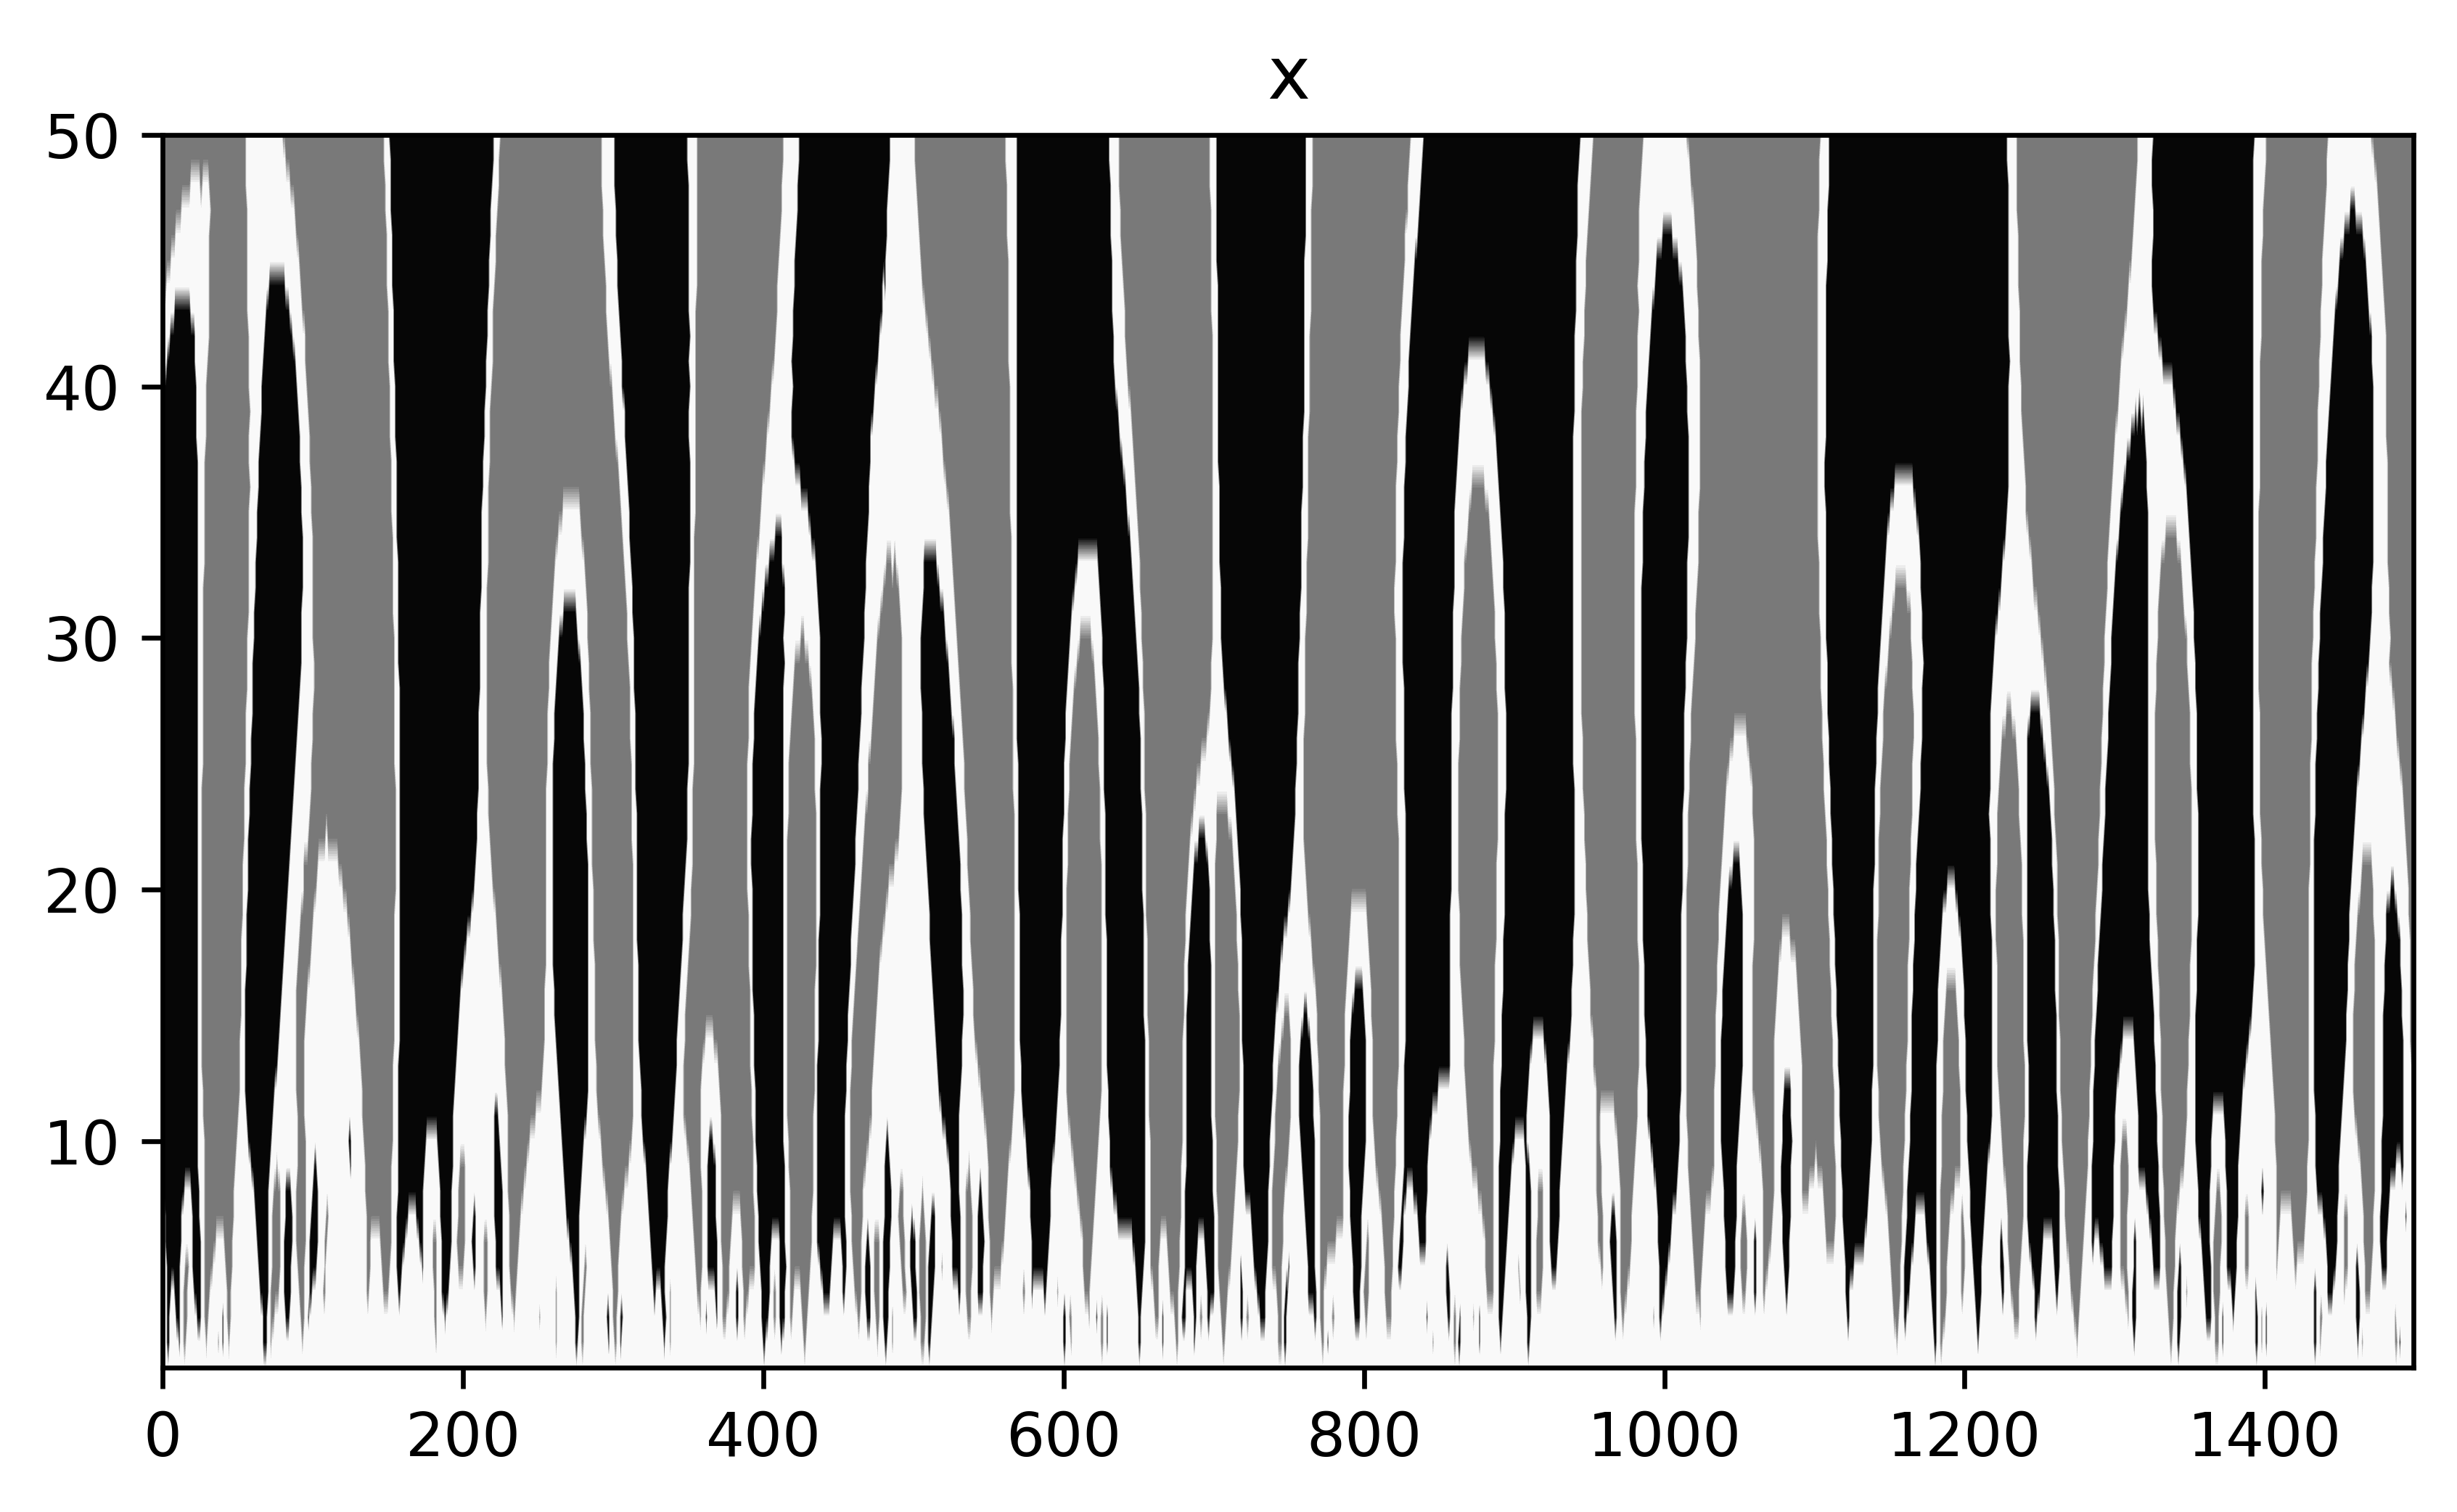

1700 50


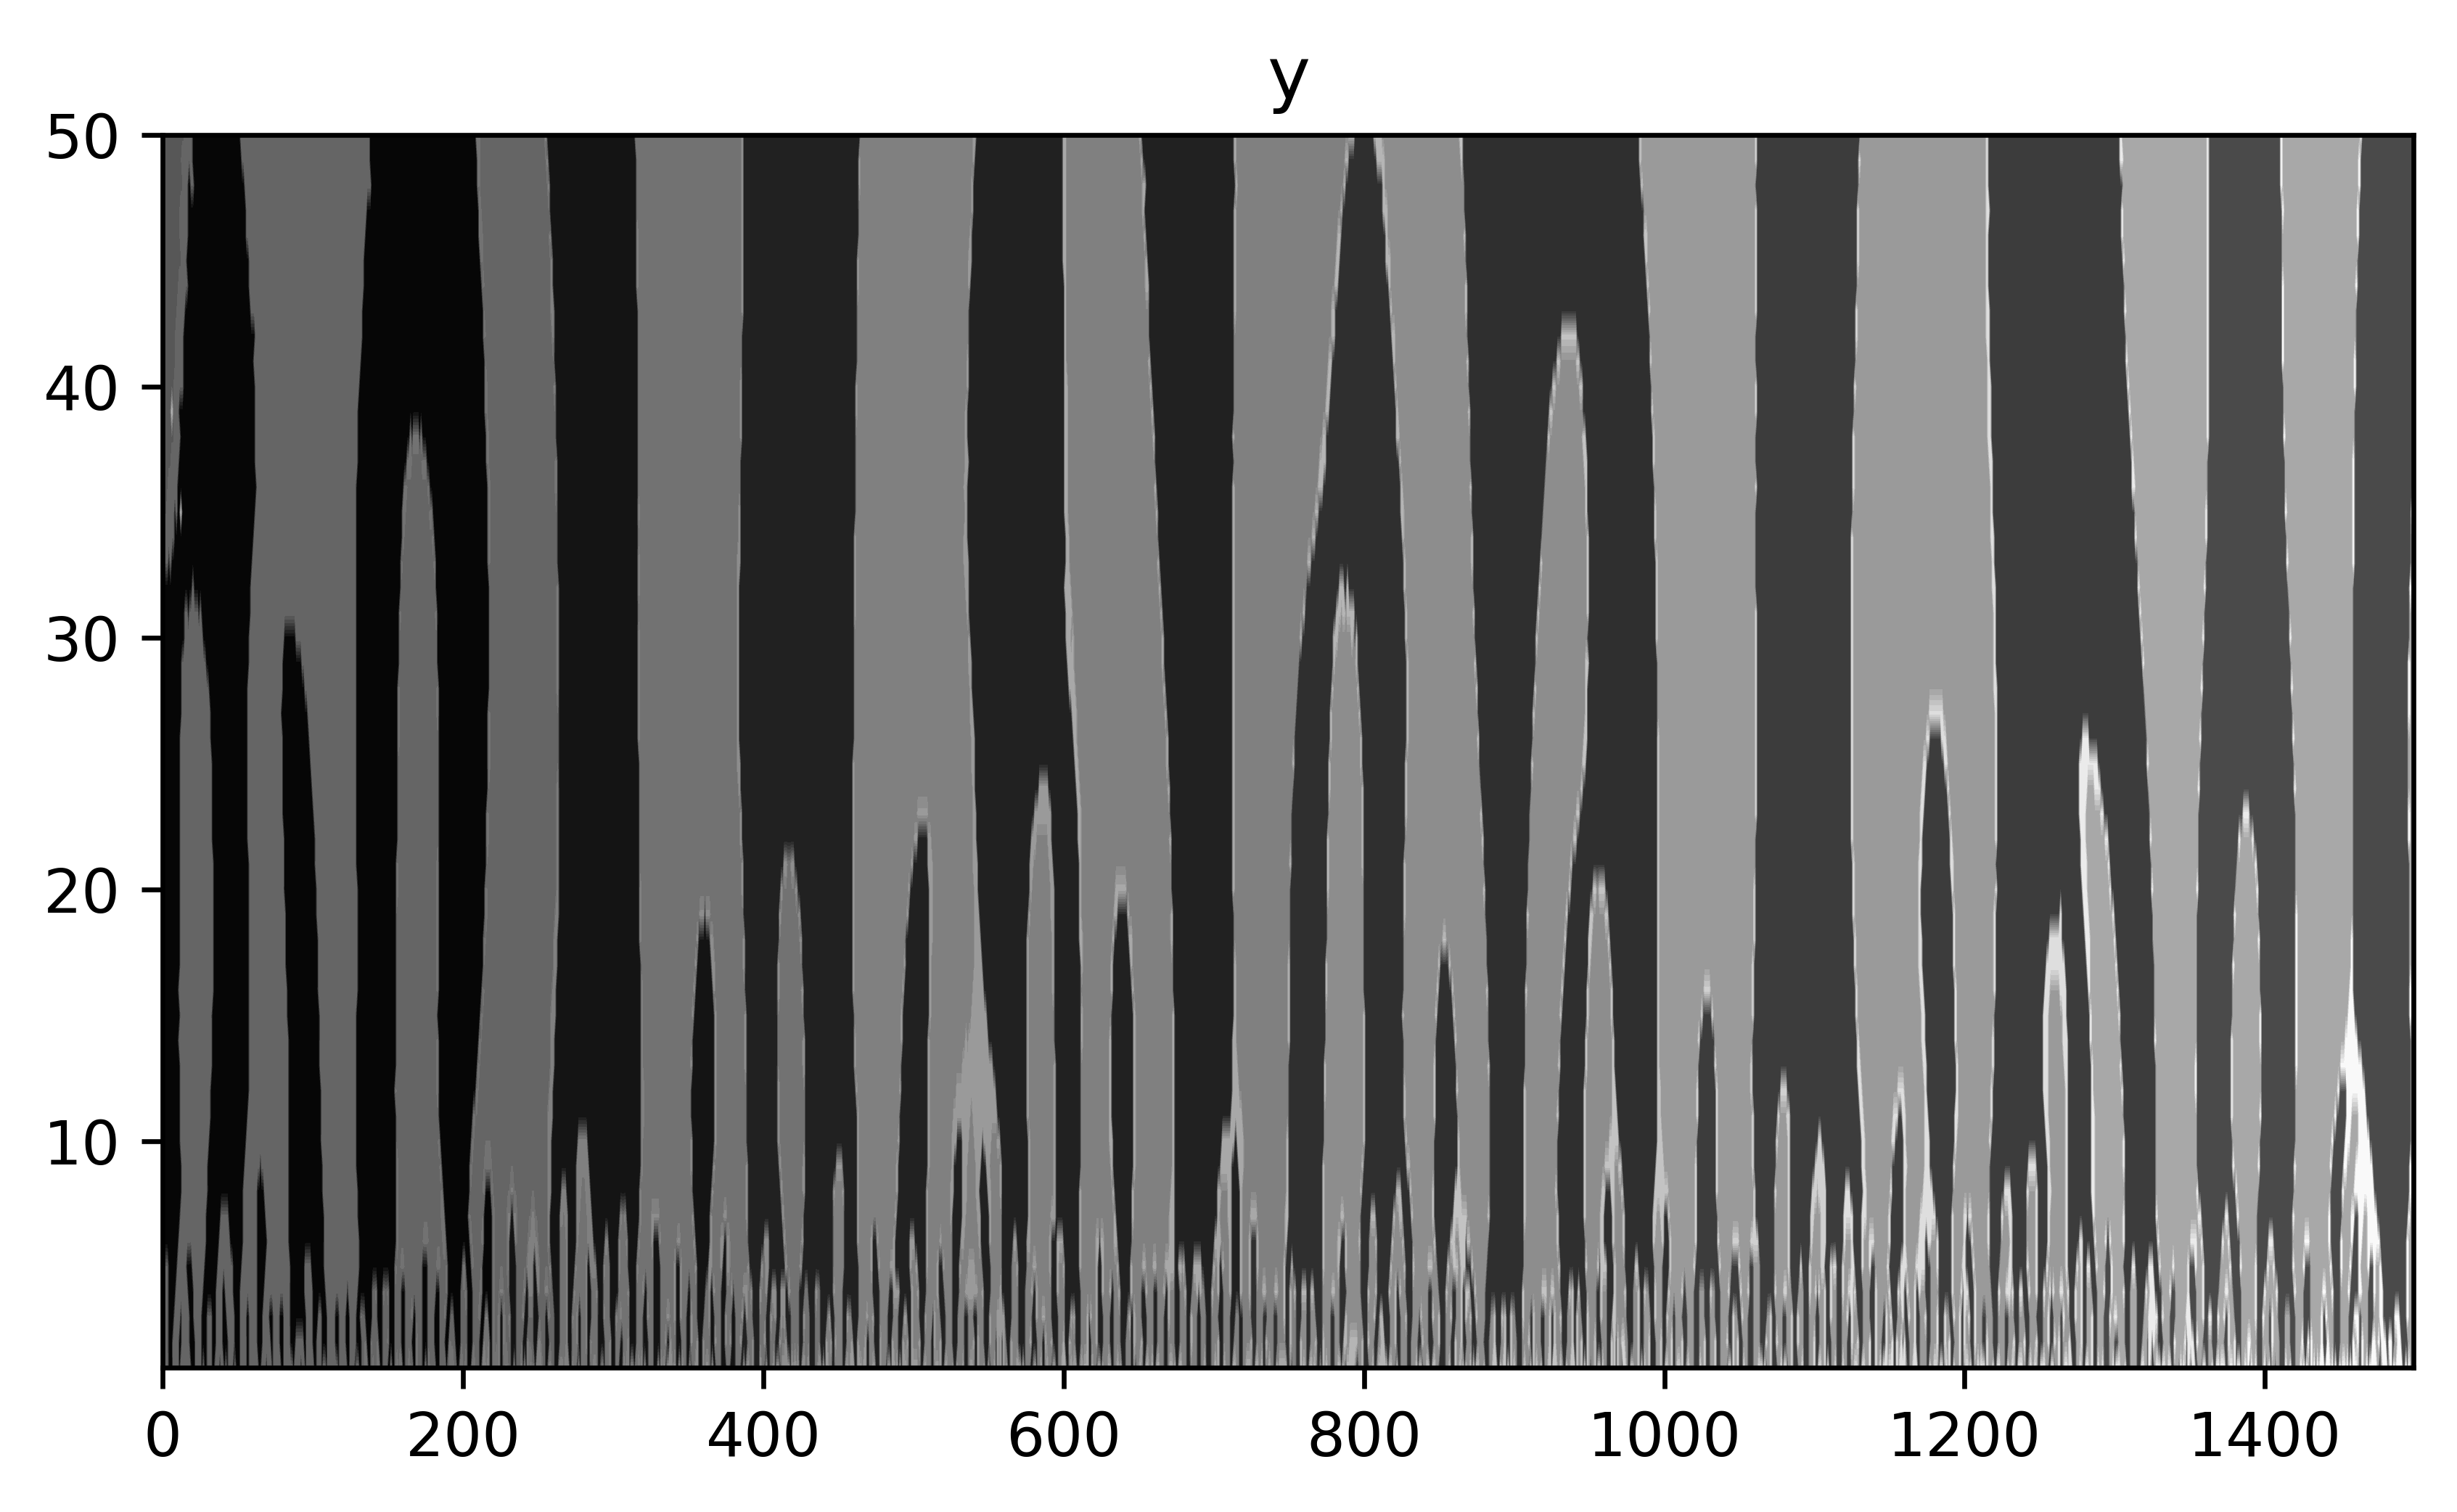

1700 50


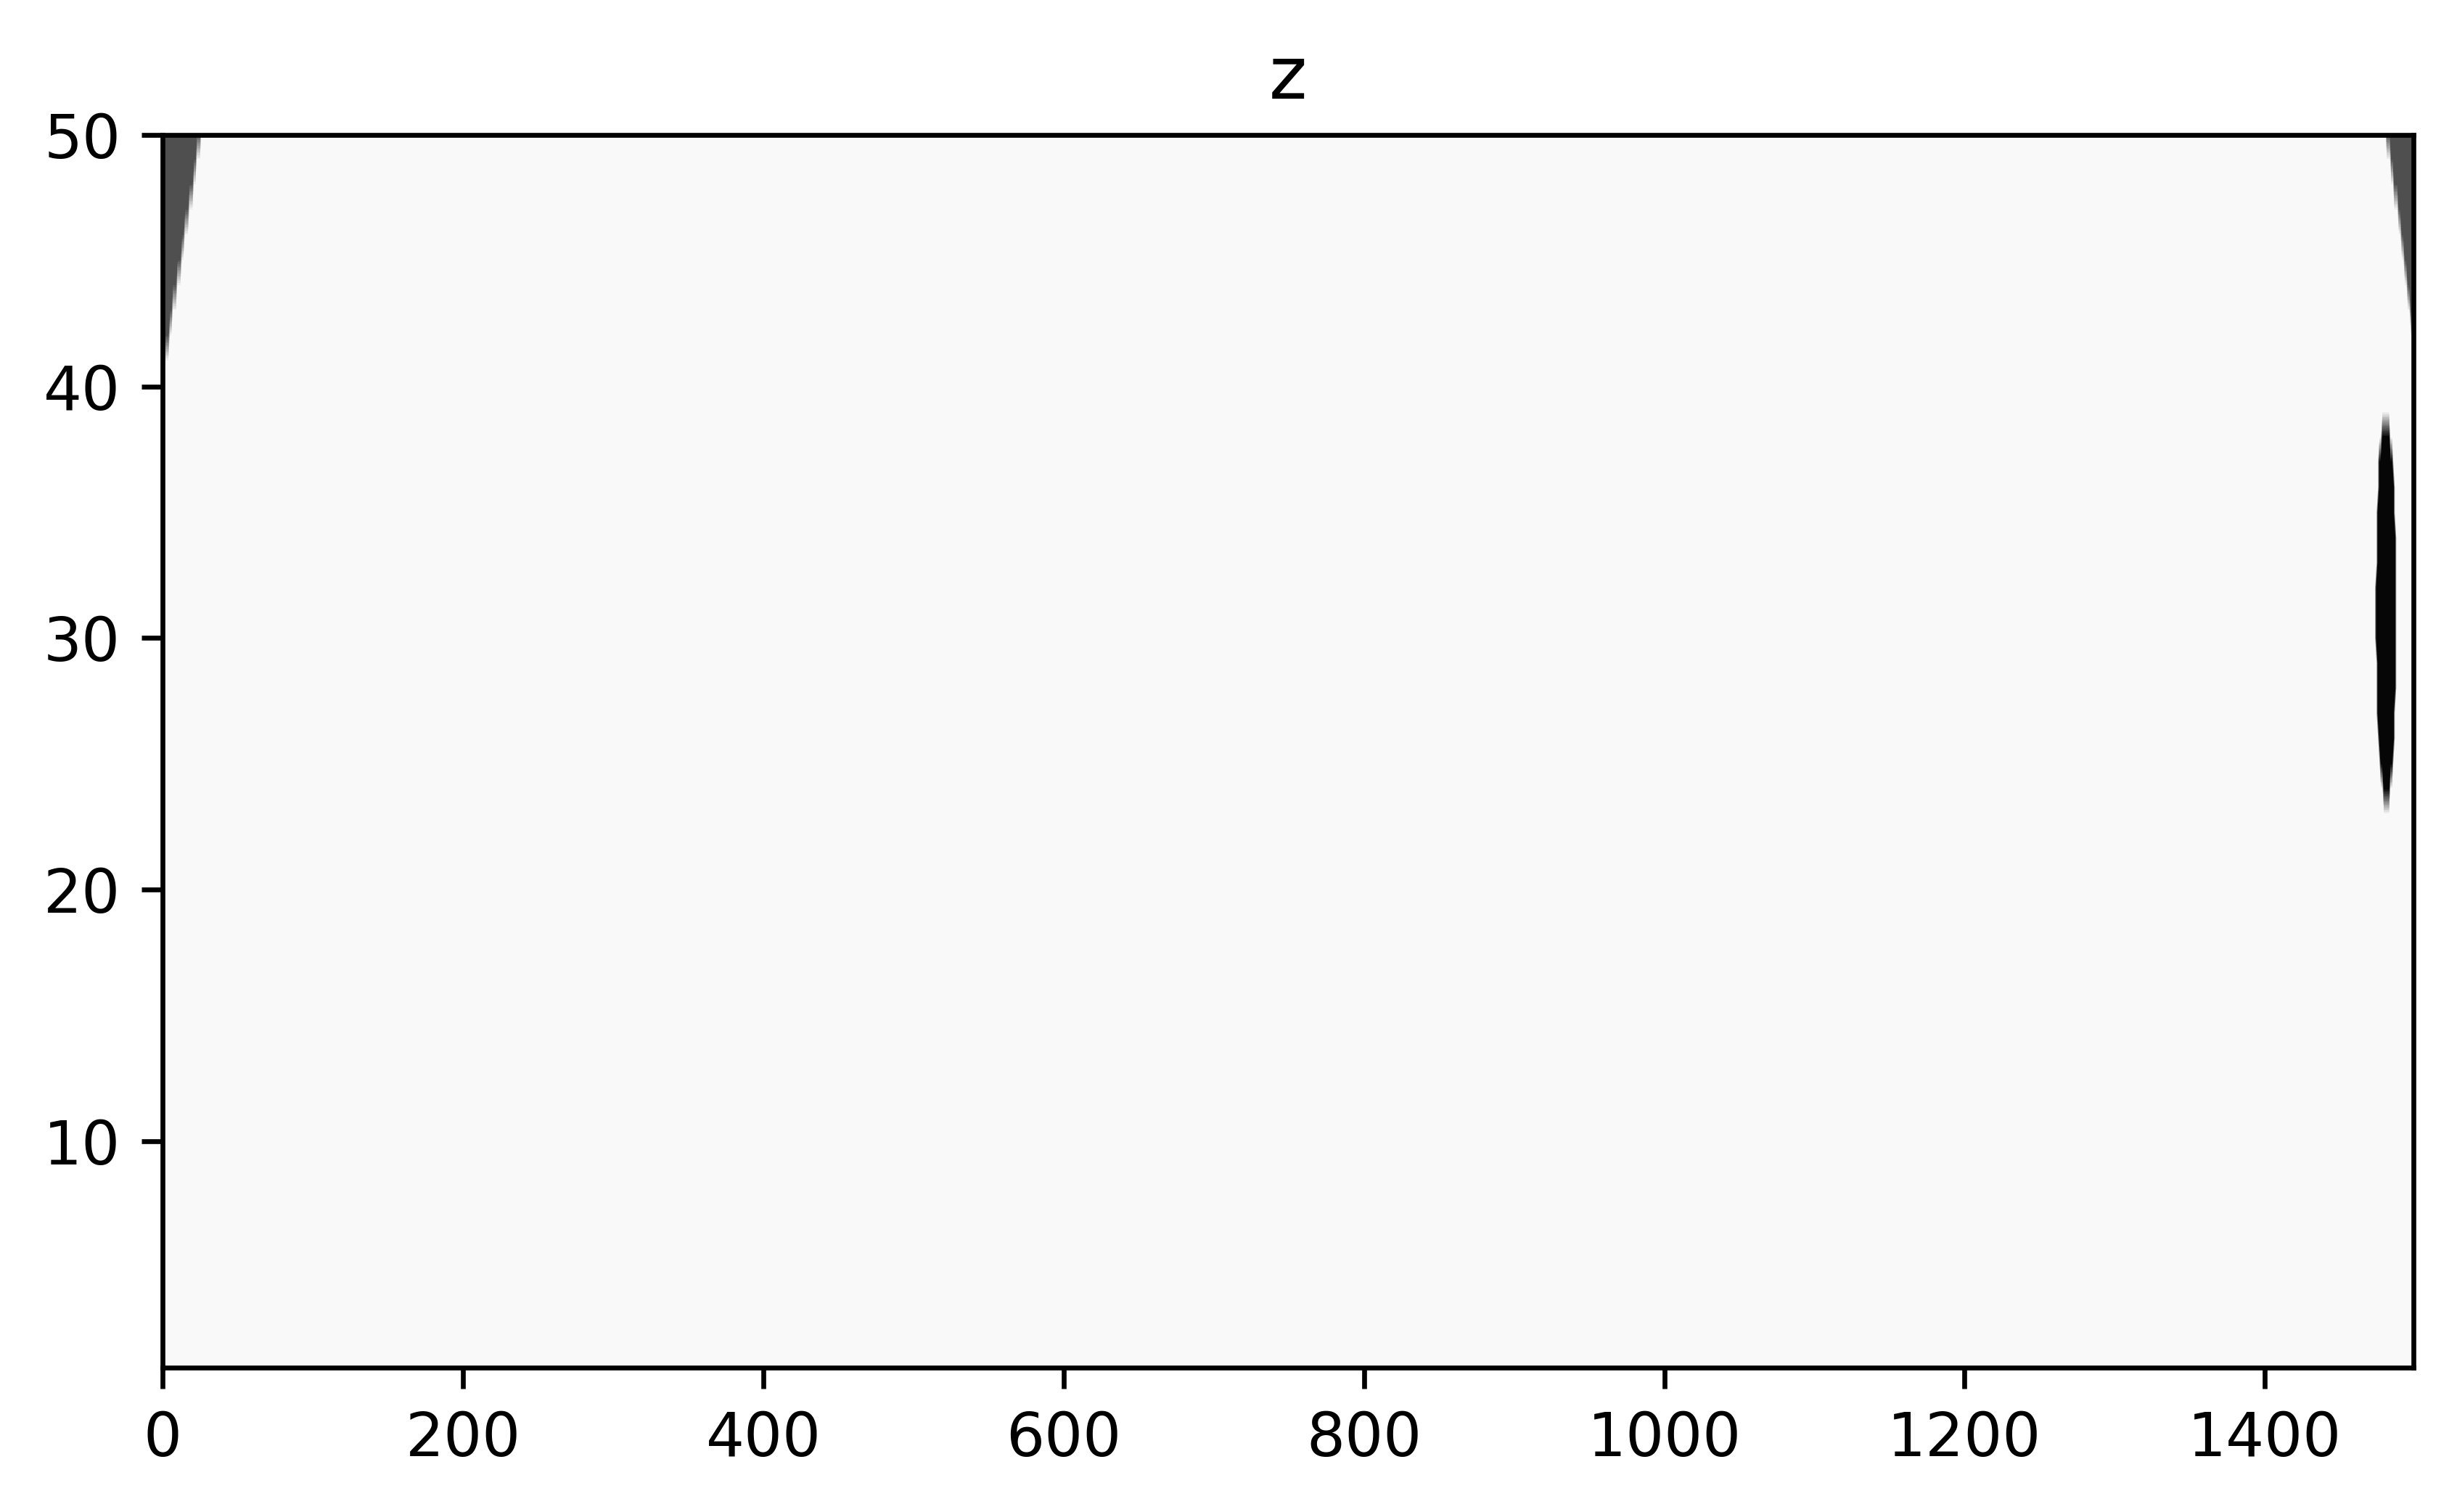

In [ ]:
for i in range(3):
    coord = i+2
    FpScat = fp.getLabeledThumbprint(smooth[start:end,i], wvlt,scales,slices,0.12,'both')
    #FpScat = fp.getLabeledThumbprint(ODataSet[start:end,coord], wvlt,scales,slices,0.12,'both')
    PlotFingerPrint(FpScat,'a',Header[coord],wvlt,scales,slices,trim)

In [ ]:
np.shape(ODataSet)

(60000, 6)

MovieWriter ffmpeg unavailable; using Pillow instead.


1700 30


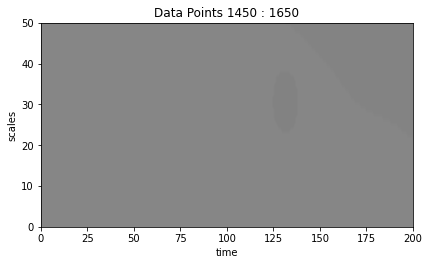

In [ ]:
#y = np.linspace(0, BeamLength, np.shape(CenterZResults[0][0])[1])
#x = np.linspace(0, BeamHeight, np.shape(CenterZResults[0][0])[0])

import matplotlib.animation as animation


Spacing = 4
ZoomSize = 200
Step = int(ZoomSize/Spacing)
Length = np.shape(FpScat)[1]
Frames = int(Length/ZoomSize)*Spacing - Spacing + 2

y = np.linspace(0, scales, scales)
x = np.linspace(0, ZoomSize, ZoomSize)
x,y = np.meshgrid(x,y)

fig = plt.figure(plt.figure(figsize=(6.67,3.75)),dpi=600)
#ax = plt.axes(xlim=(0, BeamHeight), ylim=(0, BeamLength))  

plt.ylabel(r'scales')
plt.xlabel(r'time')


print(Length, Frames)

def animate(i):
    start = i * Step
    end = start + ZoomSize 
    #print(i,start,end)
    z = np.matrix(FpScat[:,start:end])
    plt.title('Data Points ' +str(start) + ' : ' + str(end))
    cont = plt.contourf(x, y, z, levels=scales, cmap='gray',vmin=-100, vmax=100)
    #time.sleep(1)
    return cont  

anim = animation.FuncAnimation(fig, animate, frames=30)

anim.save('animation.gif')

1700 50


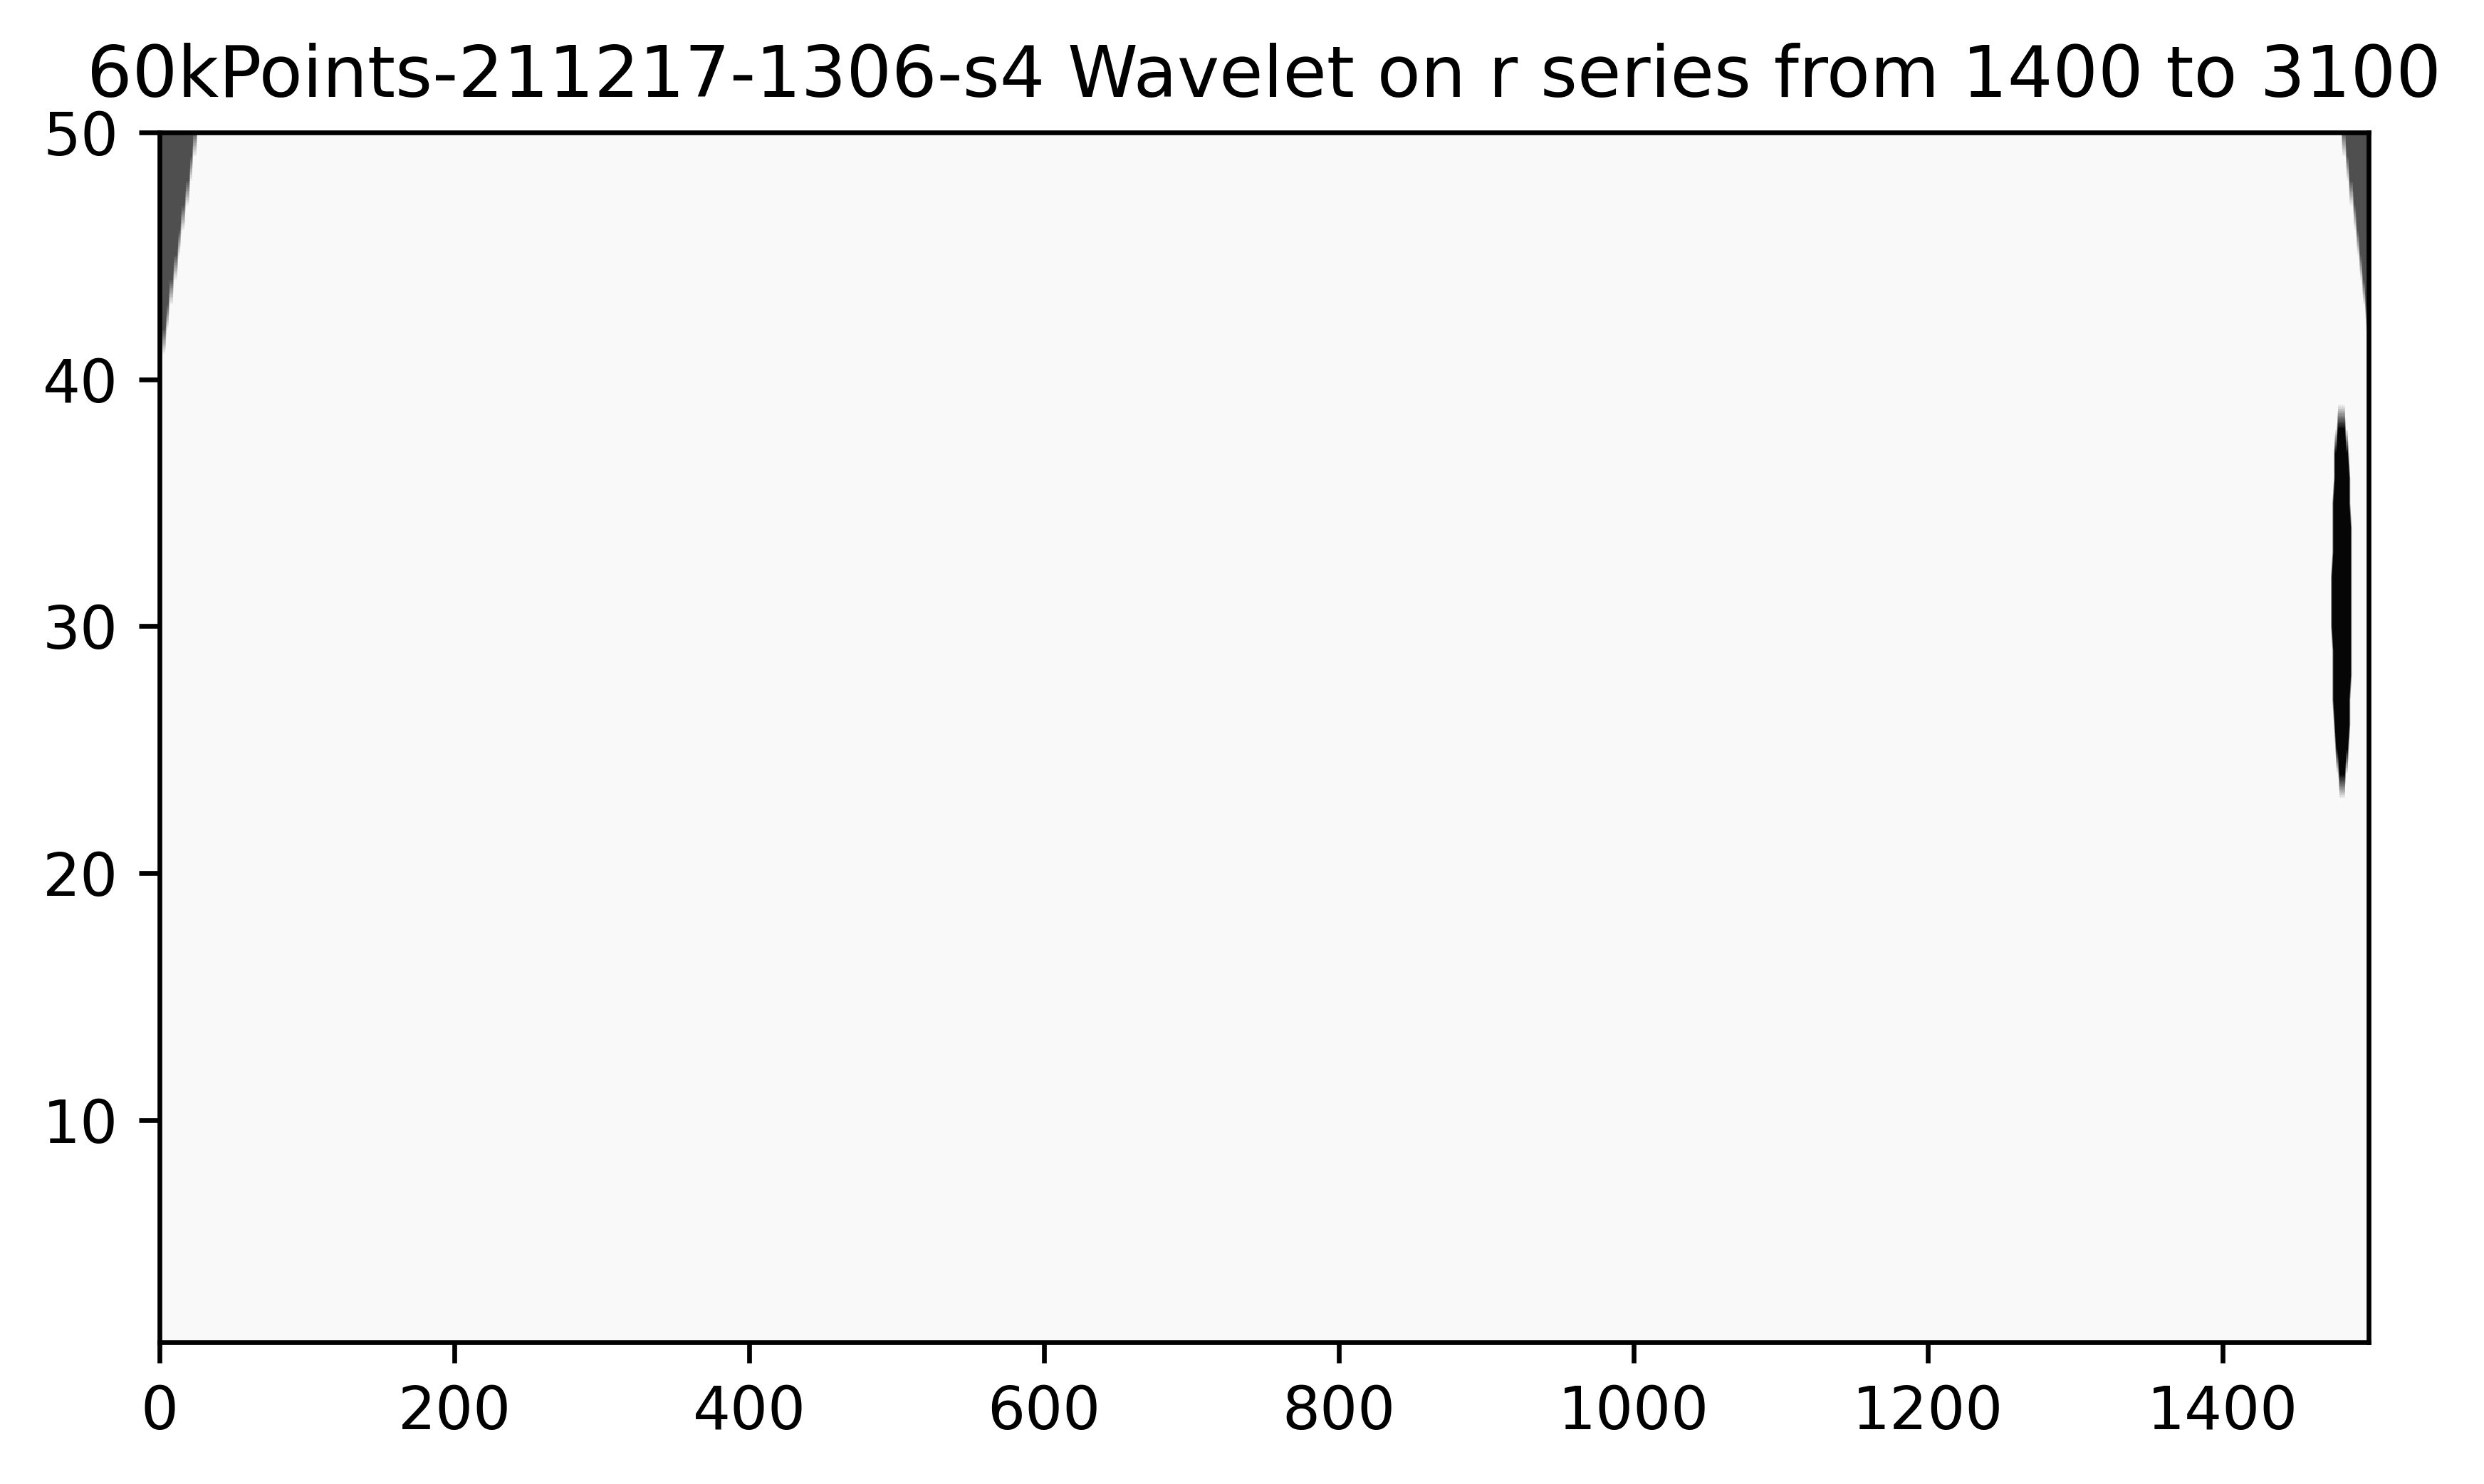

In [ ]:
PlotFingerPrint(FpScat,'a',Filename[:-4] + ' Wavelet on r series from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [ ]:
FpScatR = fp.getLabeledThumbprint(SmoothRDataSet[start:end], wvlt,scales,slices)

c:\Users\danhe\Code\RMG_NDE_Disssertation\DWFT.py:192: RuntimeWarning: invalid value encountered in true_divide
  cfX = np.true_divide(cfX, abs(cfX).max()*normconstant)


1700 50


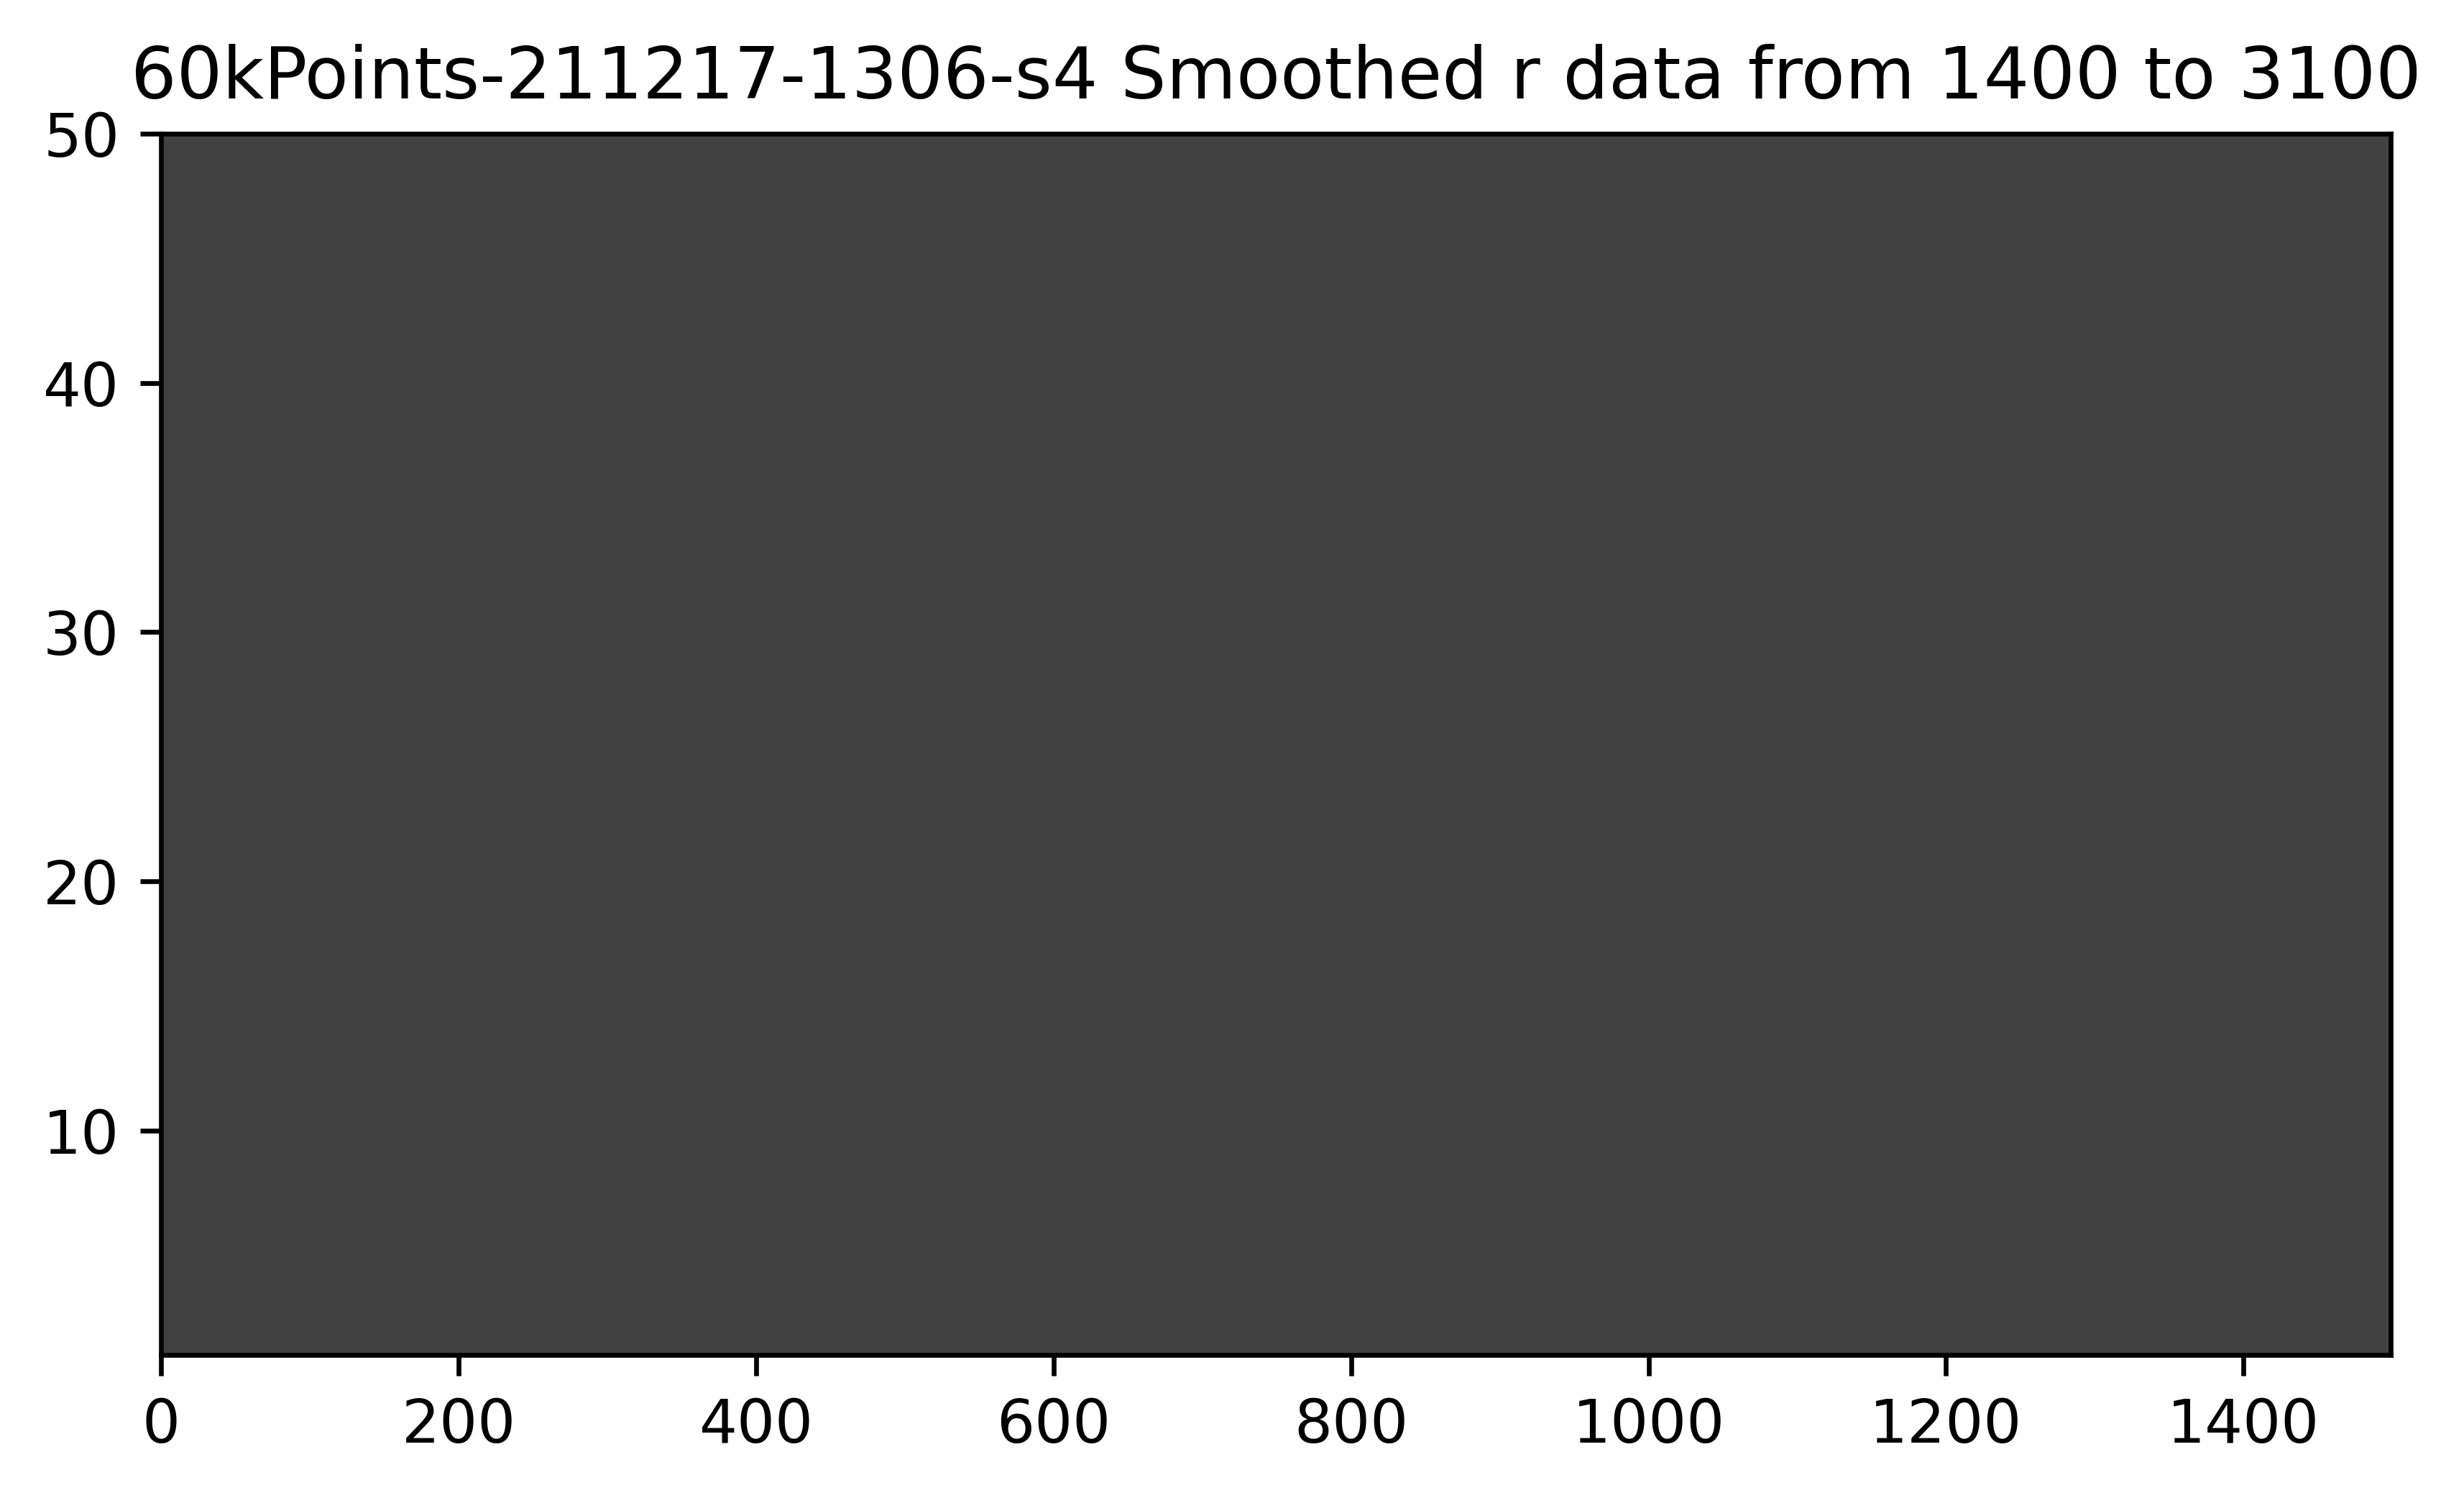

In [ ]:
PlotFingerPrint(FpScatR,'a',Filename[:-4] + ' Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [ ]:
FpScatX = fp.getLabeledThumbprint(SmoothXDataSet[start:end], wvlt,scales,slices)

1700 50


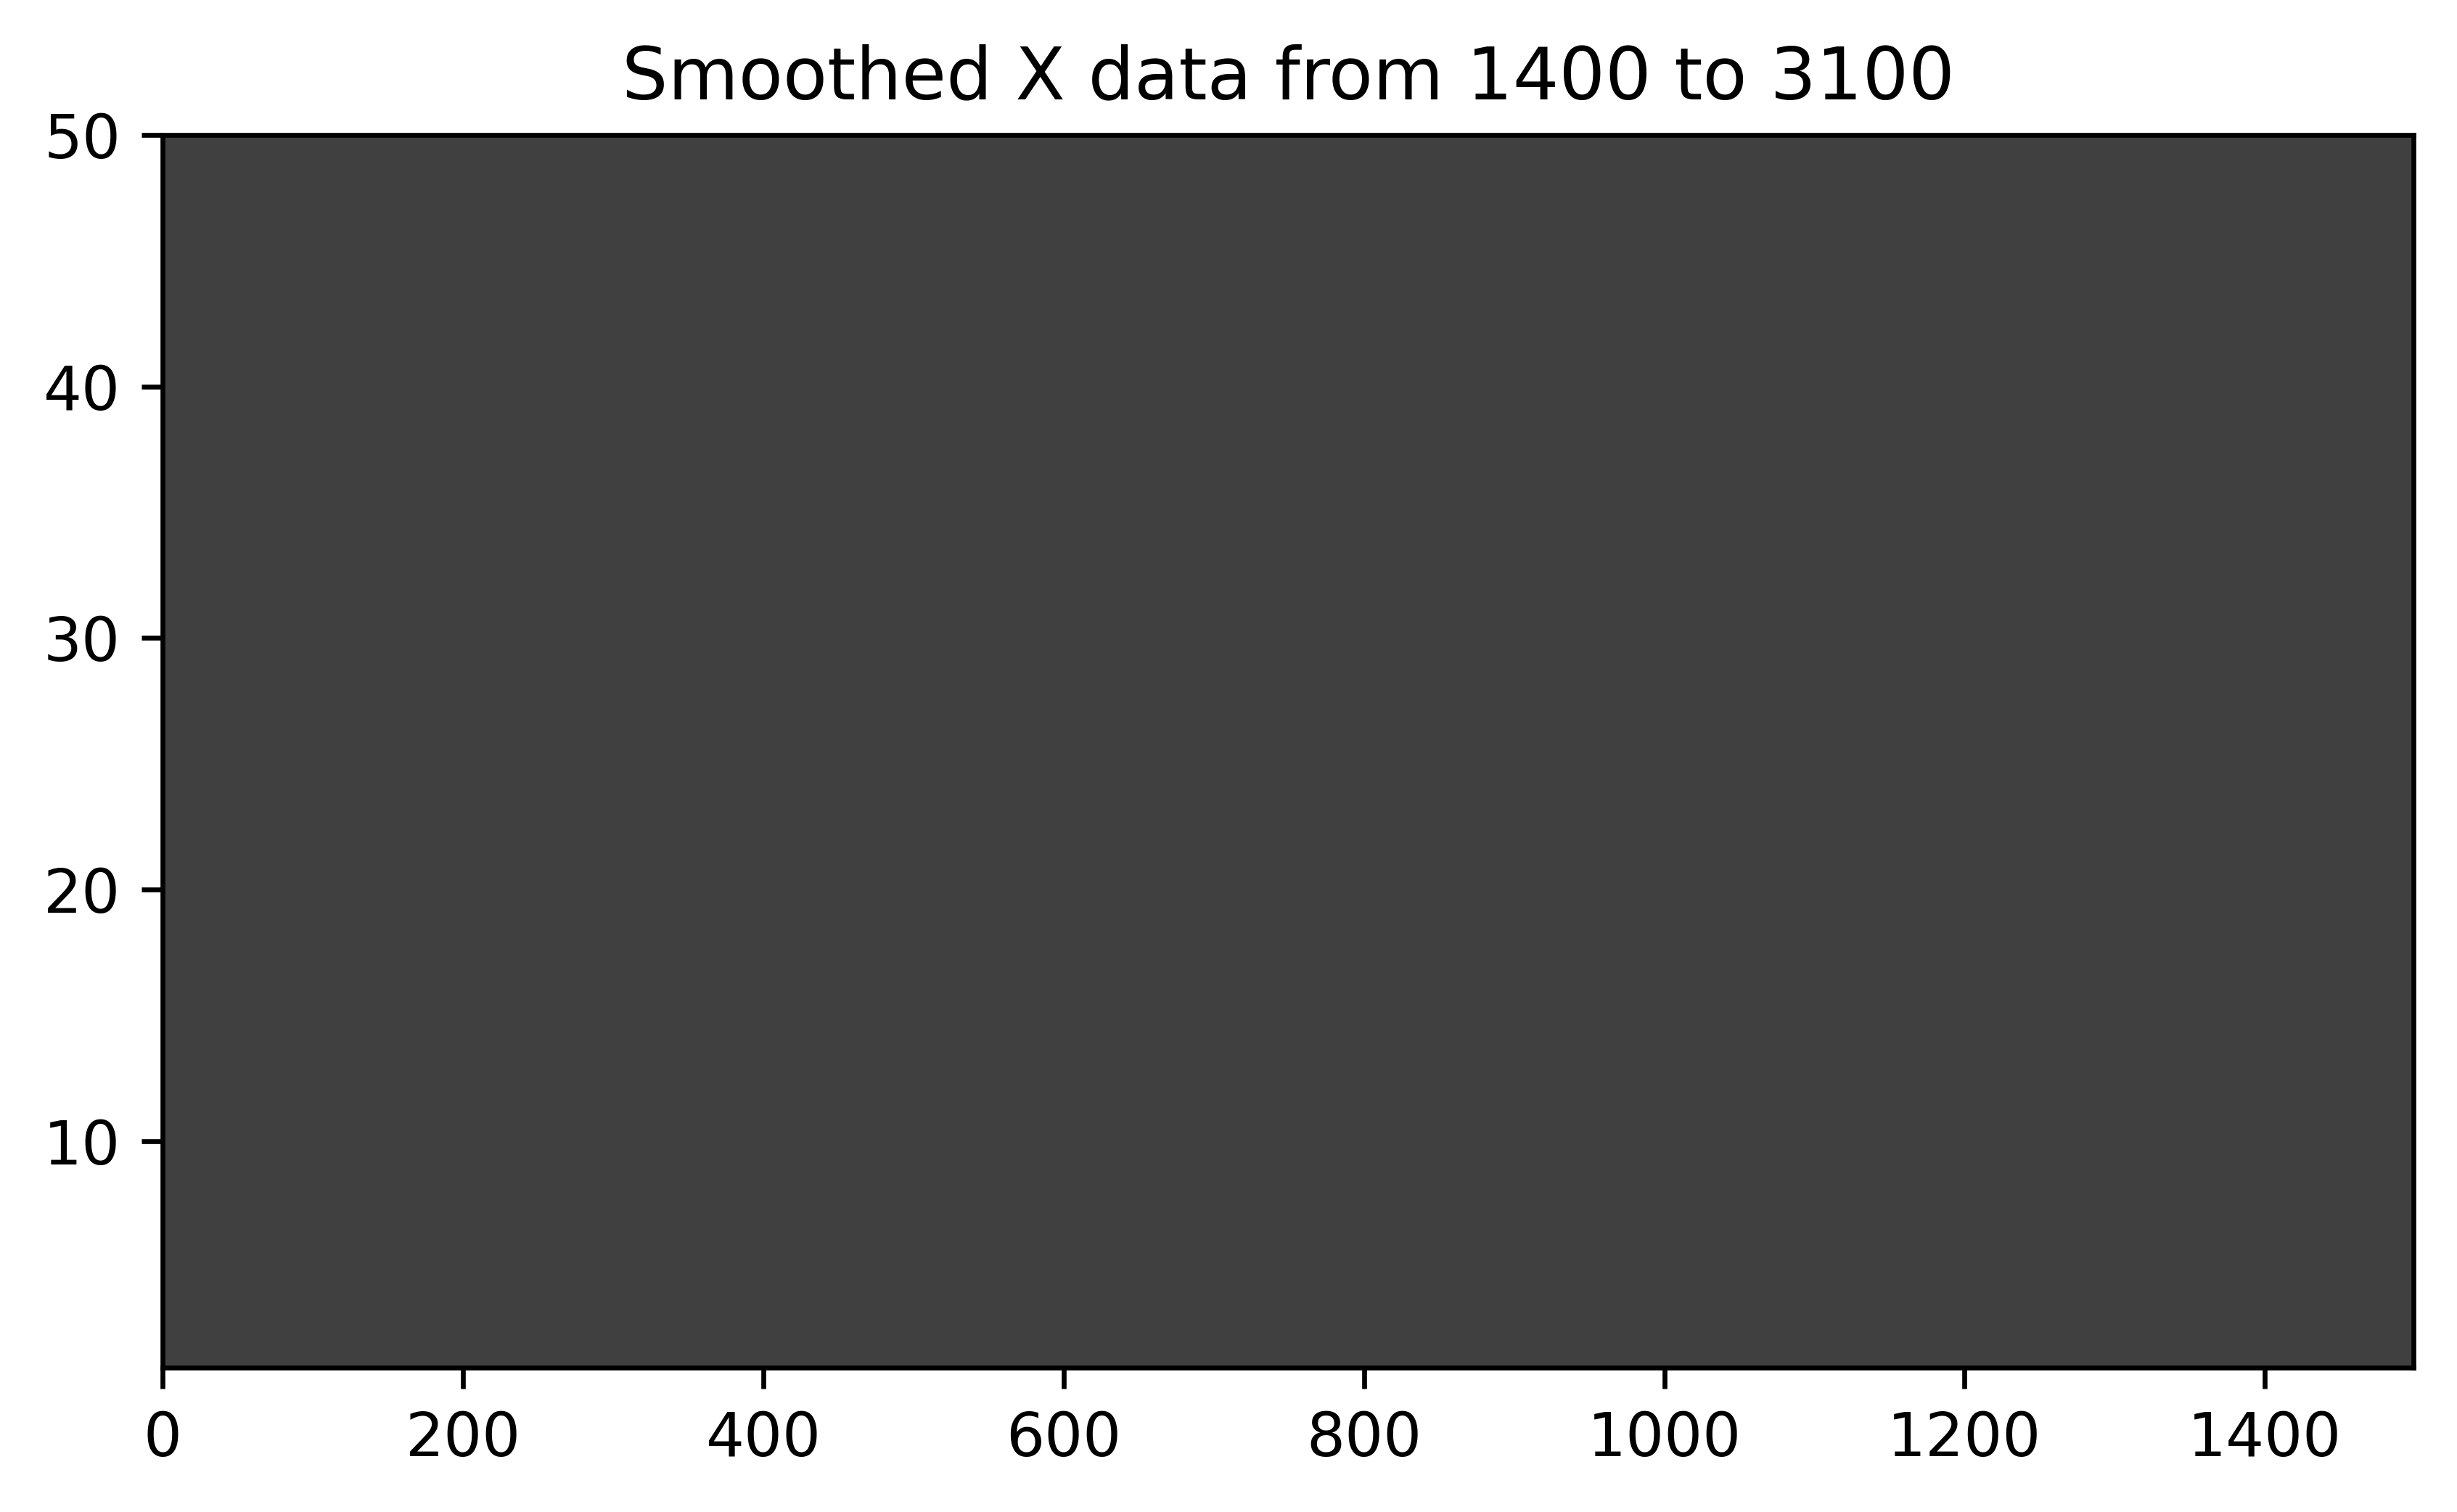

In [ ]:
PlotFingerPrint(FpScatX,'a','Smoothed X data from '+str(start)+' to '+str(end),id,scales,slices,trim)